<h1>Math</h1>

In this section, we are going to be introduced you to this next notebook of the AB testing notebooks, which is all about the explore exploit dilemma and different algorithms for solving it

---

<h3>Explore-Exploit Notebook Introduction</h3>

To start, we are going be introduced to the problem that we're trying to solve, and then in the rest of the section, we'll outline what we'll cover in the rest of this notebook

---

<h3>Casino</h3>

So like many problems in probability, the typical analogy we use for the Explore-Exploit problem starts with the casino

Let's pretend that we go into a casino and we have a choice between two slot machines

<img src='extras/52.1.PNG' width='400'></img>

Let's also assume that these are very simple slot machines, we either win or you lose, there's no in between

And if we win, the prize is always the same

So without loss of generality, we can say that winning gives us $1$ point and losing gives us $0$ points ( here points refer to a virtual reward that can not, in any way, be converted to actual money, othewise its Haram :) )

Let's now go through an imaginary sequence of events, and what we would like to do is, to think about how we would choose which machine to play

---

<h3>Action: Pick a slot machine to play</h3>

So starting out, all we see is two machines

<img src='extras/52.1.PNG' width='400'></img>

We know absolutely nothing about them other than what we just said, we can either win or lose, and when we win, you get a point 

At this point, how do we choose which slot machine to play?

In fact, it doesn't matter 

Because we know nothing about either machine, any choice would be equivalent

So let's pick  slot machine number one, and let's say, oh, no, we lost

<img src='extras/52.2.PNG' width='400'></img>

---

So what's our next move 

At this point, we know something about slot machine number one, we know that we played once and we lost once

What do we know about slot machine number two?

Well, we still don't know anything

<img src='extras/52.3.PNG' width='400'></img>

Again, we want to think about which slot machine would we pick to play now?

We would probably pick number two

And it's useful to think about why

Why pick number two instead of number one?

Well, we all know how to calculate probabilities

The probability of success would be the number of times we won, divided by the number of times we played

In the case of slot machine number one, that would be zero out of one, which is zero

But for slot machine number two, it's zero out of zero, which is undefined

And it's something in our intuition tells us that undefined is better than zero, even though numerically we can't compare these numbers

---

OK, so let's say we played slot machine number two and we won 

Here's where we stand now

We played slot machine number one once and we lost that one time

We played slot machine number two once and we won that one time

<img src='extras/52.4.PNG' width='400'></img>

(again the 'coin' does not refer, in any way, to actual money, neither does the clover to anything)

So which one do we play next?

Again, most of us would pick slot machine number two

It appears so far that slot machine number two has a better chance of winning at one $100 \%$ than slot machine number one, which is a $0\%$ chance of winning 

At this point, we should be thinking statistically, is there anything wrong with our calculations?

Is it wrong for us to assign $0 \%$ to machine number one and $100 \%$ to machine number two?

We should recognize that these estimates are exactly what we would call the maximum likelihood estimate

But we ask ourselves, is there something incomplete about these measurements?

---

Since we decided to play slot machine number two, again, we observe the result and unfortunately we lose

<img src='extras/52.5.PNG' width='400'></img>

But if we look at these machines in a maximum likelihood way, machine number two still looks better

Machine number one has a $0 \%$ chance of winning and machine number two has a $50 \%$ chance of winning

So let's play again on slot machine number two

---

All right, so we play slot machine number two again, and unfortunately, we lose yet again

<img src='extras/52.6.PNG' width='400'></img>


At this point our updated probability of winning for slot machine number two is $33 \%$

Note that this is still better than slot machine number one

So if we use our maximum likelihood estimate to greedily choose which machine to play, we will choose machine number two

---

So we play machine number two again, and unfortunately we lose again now we've lost three times and won once

<img src='extras/52.7.PNG' width='400'></img>


So the probability of winning with machine number two is $25 \%$

At this point, if we ask, which machine do we decide to play next, there would be more disagreement about whether to play machine number one or machine number two

And by that we mean relative to the first time we chose machine number two

As we recall, the first time we chose to play machine number two, we didn't know anything about it

We hadn't collected any data at that point, so our estimate of the win rate was zero out of zero, which is undefined

Now we have more data

We've won once and we've lost three times, so we calculate our win rate as $25 \%$

On the other hand, for machine number one, our calculated win rate is $0 \%$, but we've only played once 

We know that this is somehow less accurate, so we might want to play machine number one again so that we can be more certain

We want you to think about what kinds of mathematical tools do we use in your mind to come to that conclusion?

Why do we go against making a greedy choice based on the maximum likelihood estimate of the win rate?

---

<h3>What about Statistics?</h3>

So a traditional statistician doing frequentist A/B test, would be yelling at us saying
that we're approaching this problem all wrong

The correct way, he says, would be to decide before even walking into the casino how much data we should collect

This will help us to determine the statistical power of our experiment

We also need to determine what the effect size will be

If we're not familiar with effect size, it's related to the difference between the win rates of the two slot machines

Then what we'll do is we'll take that, do some fancy power calculation, and that will tell us how many samples we need to collect 

At this point, alarm bells should be ringing in our heads

How do we know the effect size if we haven't even played any of the slot machines to begin with?

That is just one of the many reasons why traditional statistical tests are very awkward :)


OK, so let's say we do your fancy calculations and it says we need to play each slot machine at 10000 times

Now, imagine the scenario

We've played each slot machine 5000 times so far

Slot machine number one has won 3 times out of 5000

Slot machine number two has won 4000 times out of 5000

So basically, our prediction of the effect size was wrong

But in order for this to be a valid statistical test in the eyes of a statistician, we must take our experiment to completion

We cannot simply stop our experiment at 5000 and say, we think slot machine number two is better than slot machine number one

That would invalidate our results

Yet another reason why traditional statistical testing is quite awkward

We might also want to consider a more serious scenario

What if we are testing a lifesaving drug and it's been successful 97 percent of the time in our test group

Do we still continue your experiment giving the placebo to the control group, which has no effect at all?

Is that ethical?

---

<h3>Adaptation</h3>

So maybe we say, we should throw out this traditional method and use a method that can adapt as new data is collected

This would be similar to what we originally did in this section using our intuition

In this notebook, we will learn about how we can do that algorithmically and quantitatively rather than just by mere feelings

What we encountered earlier in this lecture was two opposing forces

On one hand, we want it to be like a good statistician and collect lots of data so that we could make your estimate more accurate

We call that <strong>exploration</strong>

On the other hand, we wanted to choose the slot machine that had the highest win rate so that we could earn more money

We call that <strong>exploitation</strong>
 
And because these two objectives oppose one another, we call this a dilemma

Hence the term explore-exploit dilemma

---

<h3>Outline</h3>

All right, so as we mentioned, the rest of this notebook is devoted to algorithms that will solve this problem

We'll be looking at four main algorithms

The first is called Epsilon Greedy, which is something we'll be using all throughout reinforcement learning in future notebooks

The second is called the optimistic initial values method

The third is called UCB1

UCB stands for Upper Confidence Bound

And finally, the fourth is called Thompson Sampling, which makes use of Bayesian statistics, 

Sometimes, people will call this the Bayesian bendat method

And just so we don't lose sight of the big picture, these are all algorithms we can use in place of a traditional A/B test in our software system

They are methods that overcome some of the awkward problems like effect size, wanting to stop our experiment early and the controversial p-value

These methods are adaptive, meaning that they learn on the fly, which might be considered advantageous especially in high throughput online business settings

<h1>Math</h1>

In this section, we are going to discuss some of the applications of what we're about to learn in
this notebook

---

<h3>Applications of Explore-Exploit</h3>

Although we gave an example of going to the casino, that seems like a pretty contrived example

In fact, if we went to the casino and we tried to bring your computer to do some of these calculations, we would probably be banned from that casino

So don't try this at home, in other words (in fact dont go to a casino at all)


Luckily, there are actually many real world applications of these methods

In fact, this is one of the topics that we can confidently consider one of the most practical algorithms we'll ever learn

---

<h3>Comparing things</h3>

So why do we say that?

Well, the concept of comparing things to see which one is better that can be applied to almost any business

Imagine we are Apple, we just created a brand spanking new iPhone and we want to tell the world about it

We ask your designer to make a couple of advertisements for us 

So your advertiser shows us these two ads and we really love them both because our designer is very talented

<img src='extras/52.8.PNG' width='600'></img>

So which should we choose?

Of course, we should choose the advertisement for the iPhone that we believe the user is most likely to click or buy

One possible way to measure this is to determine the click through rate of each advertisement

Now, how do we determine the click through Rate or CTR?

Well, it's simply the ratio of clicks to the total number of impressions

So, for example, if 34 showed an ad 1000 times, but only 10 of those times, the user clicked on it, then it has a CTR of $1 \%$

---

<h3>How to measure the CTR?</h3>

So how can we measure the clickthrough rate in practice?

Well, we can do an experiment

Let's say we show the first ad to one million users and we show the second ad to another one million users, and then we compare the clickthrough rates we get from each ad

But there's a problem with that

How do we know one million is the correct number?

In fact, we don't 

Why not show the ad 1000 times?

Why not show the ad just 10 times?

---

<h3>The nature of probability</h3>

Well, here is where we have to remember our study of probability

The only way to have absolute precision in our statistical estimate is to collect an infinite number of samples


As we recall, as we collect more and more samples, the confidence interval of our estimate decreases

So the answer is collect as many samples as possible

---

<h3>Wait a minute!</h3>

But there's a problem with that too

Keep in mind that if one advertisement is better, that necessarily means the other advertisement is worse

That means the better advertisement will result in more profit and the other advertisement will yield less profit

So if we show the worst advertisement one million times, that means we've wasted one million impressions for a suboptimal clickthrough rate

In other words, our desire to always show only the best advertisement to exploit the optimal clickthrough rate is fundamentally at odds with our other desire to have an accurate answer for what the clickthrough rates are in the first place

---

<h3>Who cares?</h3>

Now, obviously, Apple is not the only company in the world selling things

The online advertising industry is a billion dollar industry

Almost every modern business in the world uses online advertising

In other words, the techniques we're learning here are applicable to any of the modern businesses making use of the billion dollar online advertising industry's platform

However, we don't even have to be a successful business to make use of these techniques

We can simply be someone who owns a website on the Internet

Assuming we have traffic and we have a choice between two or more options on our website, then we can apply these techniques

For example, suppose we hire a designer to create a new design for our website and we would like
to know if your old design gets better traffic than our new design

Perhaps we would like to know whether a big buy now button works better at the top of our sales page or at the bottom of our sales pitch

Perhaps we would like to know what kind of price ending to use on the products on our website

For example, we could sell our product for $\$ 20$ flat, or we could sell it for $\$ 19.99$ or
$\$19.98$

Which one is more likely to yield more conversions?

Of course, these are all fundamentally the same problem, we want to know which choice is better and to exclusively use the better choice, but we need to collect data in order to make that choice

As a side note, from our perspective, both clickthrough rates and conversion rates are treated the same since they are both a form of calculating some generic success rate

Obviously, from a monetary perspective, a click isn't as valuable as a conversion

But for us, we're not necessarily measuring the revenue or profit itself, just the success rate

---

<h3>New Feeds</h3>

Another great example is the Facebook news feed, and of course, this isn't exclusive to Facebook

This applies to any company that has a news feed like The New York Times

Ideally, we would want to have news articles that people are going to click on or read

And why is that?

Well, funny we should ask, see, when people click on these articles, they see more ads

When they show us an ad, they make money

Thus it is the circle of life

Advertisers make money from us when we buy things

And websites that show ads make money from the advertisers simply for using that space on their website to put the advertisement

So The New York Times wants us to click on articles and Facebook wants to keep us engaged scrolling through the news feed for as long as possible

The more you scroll, the more ads we see

Again, what are we doing?

We are measuring a success rate 

For The New York Times, that means we clicked on the article 

For Facebook, that means we read, watched or somehow engage with the news feed item

Once we've measured the success rate of each news feed item, we can show them to users in order with the highest success rate at the top

---

<h3>Gaussian vs Bernoulli</h3>

One thing we're going to look at in this notebook is using a Gaussian distribution instead of a Bernoulli

If we recall, Bernoulli's are for measuring success or failure

They're ideal for the scenario when we only have two outcomes click or no click, buy or no buy

But what if our reward is a continuous value?

In that case, a Gaussian distribution may be more appropriate

Some examples are measuring revenue or profit or the number of users

---

<h3>Summary</h3>

So hopefully this section settled this question for us and we now understand why they explore exploit dilemma is one of the most, if not the most practically applicable concept in machine learning

Almost every business and online entrepreneur can make use of these algorithms 

Any time we have a choice which design, which button, which headline, which post we can apply these methods

<h1>Math</h1>

In this section, we are going to study what is probably the most important algorithm of this notebook, Epsilon-greedy

---

<h3>Epsilon-Greedy</h3>

The reason we say it's the most important is because if we're planning on studying reinforcement learning anywhere from Montecarlo to Q learning to Deep Q learning and other similar approaches, we'll be using Epsilon greedy the whole way through

On the other hand, we'll find that the other methods, such as UCP1 and the Bayesian method, often perform better for this particular use case

Overall, however, these algorithms all have the same general API from a programming perspective

They all give us a way to balance exploration with exploitation

---

<h3>Epsilon-Greedy</h3>

So what's the main idea behind Epsilon greedy?

Well, let's remember what the problem is with exploring and exploiting

We observe that if we just take a naive maximum likelihood estimate of the win rate, this is highly detrimental for exploration and data collection

We might get lucky or unlucky with the particular bandit and then end up exploiting something suboptimal because the win rate on all the other bandits is just zero out of one

By the way, it's important to give a name to that strategy

We call this the greedy method

For someone who has never taken a class on algorithms and data structures, that might seem like a confusing term, but basically it means to do something short sighted or to use only immediately available information as a heuristic to make a decision

In our case, being greedy means playing the bandit with the highest maximum likelihood win rate without any regard to how much data we've collected or how confident we are in the win rates that we calculated

---

So why is it important to call this the greedy strategy?

Well, as we can probably tell by its name, epsilon-greedy is perhaps some kind of modification of this basic or greedy strategy

And if that's what we guessed, then we would be correct

So Epsilon Greedy says instead of always taking the greedy action, we're going to have a small probability of just doing something completely random

That is to say, with some small probability, I'm going to choose a slot machine at random without
any regard to what it's a win rate is

And of course, that small probability is given by the value of epsilon $\varepsilon$

Typically, we would choose the value of Epsilon like $10\%$ or $5\%$

If we were to write some pseudocode, here's how greedy and epsilon-greedy would compare

Let's assume that for each algorithm we never stop playing, so each algorithm goes inside an infinite loop

In the purely greedy case, we select the ```j```th bandit, which is the bandit that has the current largest mean

Once we've selected the ```j```th Bandit, we play that bandit and collect the reward called $x$ R

Remember, that $x$ can be zero or one so far 

We'll see other cases where $x$ can be a real number, but just hold that thought for now

Once we have $x$ We can update the estimate for the mean of the bandit we selected

```
while True:
    j = argmax(predicted bandit means)
    x = play bandit j and get reward
    bandits[j].update_mean(x)
```


In the Epsilon greedy case, there's one extra step where we select the bandit 

Instead of just taking the ```argmax```, we start by choosing a random number ```p``` between zero and one

If ```p``` is less than $\varepsilon$, we choose a bandit at random from a uniform distribution

Otherwise we choose the ```argmax```

This ensures that we choose a random bandit with probability $\varepsilon$

```
while True:
    p = random number in [0,1]
    if p < epsilon:
        j = choose a random bandit
    else:
        j = argmax(predicted bandit means)
    x = play bandit j and get reward
    bandits[j].update_mean(x)
```

Now, a common question is, shouldn't it be $p > \epsilon$  and not $p < \epsilon$?

If that's the question we have, we strongly recommend writing some simple code and checking the frequency of how many times $p$ is less than and greater than $\epsilon$

That should help us clear things up

Finally, the last few steps are the same, we play bandit ```j``` and then update the mean for bandit ```j```

---

<h3>Additional Details</h3>

At this point, we should be ready to implement our own version of the Epsilon Grealy algorithm, but we want to go over a few more key points that are important to analyze its efficacy

Let's remember that the reason we want to explore, which is accomplished by having a non-zero epsilon, is so that we can collect data about each bandit

And the reason we want to collect data about each bandit is because we want our estimates of their win rate to be accurate

But at what point do we say we have enough data, let's stop exploring 

What happens if we let the algorithm continue to run forever?

In that scenario, our algorithm will never stop exploring and hence our total collective reward will be suboptimal

By definition, if one of the bandits is optimal, then the other bandits are not optimal

Let's suppose we have two bandits with win rates and $90 \%$ and $80 \%$

Clearly, if we knew this information beforehand, we would only play the bandit with a $90 \%$ win
rate and never play the bandit with the $80 \%$ percent win rate

Of course, we can't do that without collecting data, so we run the Epsilon greedy algorithm instead

In the long run, however, we will never reach a $90 \%$ win rate due to the fact that we always
have a small chance of exploration and playing the suboptimal bandit

We can break down our calculation of the average win rate like this

First, suppose that after a long time we've identified the optimal bandit so that for $1-\varepsilon$ of the time we will select the optimal bandit, which gives us expected reward $0.9$

Then $\epsilon$ of the time, we will choose either of the bandits with equal probability

So when that happens, our expected reward is  $0.85$, halfway between $0.8$ and $0.9$

Therefore, our total expected reward 

$$\large E(R) = (1-\varepsilon)0.9 + \epsilon \left(\frac{0.8+0.9}{2}\right)$$

---

<h3>Decaying Epsilon</h3>

One option to improve this behavior is to have a decaying epsilon 

In the literature, there have been several different kinds of cooling schedules used

We want to be aware of what they are and perhaps do an experiment to see what works best for our use case

So one option is to have the value of epsilon decay proportional to one over the number of steps

$$\large \varepsilon(t) \propto \frac{1}{t}$$

Another option is to let epsilon decay linearly and then stop at either zero or a small value, slightly larger than zero

$$\large \varepsilon(t) = \max(\varepsilon_0 - kt,\varepsilon_\text{min})$$

Another option is to use exponential cooling or one over the logarithm

$$\large \varepsilon(t) = \varepsilon_0 \alpha^t$$

$$\large \varepsilon(t) = \frac{a}{\log(bt+c)}$$

So there are many options for us to try out 

The common theme among them, being that they all decrease over time

<h1>Math</h1>

In this section, we are going to do a little exercise that might help us in our implementation of epsilon-greedy

---

<h3>Calculating a Sample Mean</h3>

This section is all about how to calculate a sample mean

$$\large \bar X_N = \frac{1}{N} \sum^N_{i=1}X_i$$

Although it seems very simple, this section will introduce us to a very important concept that we are going to gradually build on as we progress throughout later notebooks

Now, we might object to this and say, we thought we already knew how to do this

And the answer to that is just wait and see.

--

<h3>Binary Rewards</h3>

First, let's start with a question we might have

If we're working with binary rewards, that can only be zero or one, what is the purpose of having a sample mean

We might say, isn't the Bernoulli distribution a categorical distribution?

In fact, we can prove to ourselves that if the values of the random variable can only be zero or one, then the sample mean is exactly the maximum likelihood estimate of the Bernoulli parameter 

$$\large \hat \theta = \frac{1}{N} \sum^N_{i=1}x_i, \text{ where } x_i \in \{0,1\}, \text{ and }x_i \sim \text{ Bernoulli}(\theta)$$

note : we've already shown this in the previous notebook 

---

<h3>Calculating a Sample Mean</h3>

So now that we understand that we can unify real valued rewards and binary rewards under the same sample mean calculation, let's talk about what's the best way to calculate the sample mean 

Using the formula for the sample mean, we might suggest that this is quite obvious

Just take all the values of $X$ that we've collected, add them together and divide by the total number of $X$'s that we have

$$\large \bar X_N = \frac{1}{N} \sum^N_{i=1}X_i$$

The question is, what's wrong with this?

---

Remember that we are going to run our algorithms essentially forever 

In order to run forever, we must have a forever amount of space to store those values of $X$ that we collect

And obviously our computers or our servers don't have an infinite amount of space

And even if they did, calculating a summation is $O(N)$, so the more data we have, the longer it will take and that will increase linearly with how much data we collect

Here's our claim, we claim that we can make the calculation of a sample mean $O(1)$ in both space and time complexity, no matter how much data we collect 

---

<h3>Iteratively Updating the Sample Mean</h3>

The key is that we can calculate a sample mean using the previous sample mean

Let's call the sample mean after collecting $N$ samples $\bar X_N$, and this is so that the sample mean after collecting $N_1$ samples is $\bar X_{N-1}$

We can write down both of these, which hopefully is pretty obvious

$$\large \bar X_N = \frac{1}{N} \sum^N_{i=1} X_i, \qquad \qquad  \bar X_{N-1} = \frac{1}{N-1} \sum^{N-1}_{i=1}X_i$$

Now that we know the main trick conceptually, let's make this an exercise

Can we express $\bar X_N$ in terms of $X_{N-1}$? 

---

OK, so here's what we do 

First, we can take $\bar X_N$ and split up the summation so that we only sum up to $N-1$

Then we leave $X_N$ by itself

$$\large \bar X_N = \frac{1}{N} \left(\sum^{N-1}_{i=1}X_i + X_N\right)$$

This is just the last sample that we've collected

The next step is to realize that the sum of the $X_i$s from $1$ up to $N-1$ can be expressed in terms of $X_{N-1}$

We just have to rearrange the equation from earlier

It's clear that this sum is just $(N-1)\bar X_{N-1}$

$$\large \bar X_{N-1} = \frac{1}{N-1} \sum^{N-1}_{i=1} X_i \iff (N-1)\bar X_{N-1} = \sum^{N-1}_{i=1} X_i$$

We can substitute this into our expression for $\bar X_N$ to get the sample mean at time $N$ in terms of the sample mean at time $N-1$

$$\large \bar X_N = \frac{1}{N} \left((N-1) \bar X_{N-1} + X_N \right)$$

---


One interesting thing we can do, although it's not totally clear why we'd want to do this at this point, is split this formula up as follows

The first step is to multiply out the $\frac{1}{N}$ term



This gives us and $\frac{N-1}{N}$ as the first coefficient and $\frac{1}{N}$ as the second coefficient

$$\large \bar X_N = \frac{N-1}{N}  \bar X_{N-1} + \frac{1}{N} X_N $$

The second step is to simplify $\frac{N-1}{N}$ to $1 - \frac{1}{N}$

$$\large \bar X_N = \left( 1 - \frac{1}{N}\right)  \bar X_{N-1} + \frac{1}{N} X_N $$

And the third step is to multiply out the $\bar X_{N-1}$ term and then combine the terms that have the coefficient $\frac{1}{N}$ 

$$\large \bar X_N = \bar X_{N-1} + \frac{1}{N}( X_N - \bar X_{N-1})$$

At this point we may or may not know why we did this, but that's OK

Just think of it as a fun math exercise and we'll return to it later

---

<h3>What did we learn?</h3>

So what have we learned in this section

We've seen that the sample mean at time $N$ can be evaluated in constant time and the amount of space we need to make this calculation is also constant

We only ever need to store a few things

The previous sample mean the newest sample and the number of samples we've collected

This by itself is quite useful and should help us implement not just Epsilon greedy, but many of the other algorithms we'll learn about

And although this is quite useful on its own, we'll see later when we study reinforcement learning that it actually goes much deeper

<h1>Math</h1>

In this section, we want to discuss how to approach being hands on and doing the exercises in this notebook

---

<h3>Designing our Bandit Program</h3>

This notebook is all about Bendit methods

One very important concept for us to understand is that we're going to introduce several different algorithms in this notebook, but they are all used for solving the exact same problem

---

To see what we mean by this, let's recap what this means in supervised learning

In supervised learning, we are interested in implementing the algorithm we just learned about

The main outline is always the same, no matter what supervised learning algorithm we're implementing

The main steps are as follows

Step one load in the data

Step twi instantiate our model

Step three, train our model

And step four, evaluate our model

Our job as the implementer of the algorithm is to write up the fit and predict functions

This is the case for all supervised learning algorithms

In other words, we might want to think of this as a fill in the blanks type of task

Steps one to four are boilerplate, meaning that no matter what algorithm we're implementing, we
still have to do these things

```python
class MyModel:
    def fit(X,Y):
        # OUR JOB
    def predict(X):
        # OUR JON
# boilerplate
Xtrain,Ytrain,Xtest,Ytest = get_data() # 1. Get data
model = MyModel() # 2. Instantiate model
model.fit(Xtrain,Ytrain) # 3. Train model
model.score(Xtest,Ytest) # 4. Evaluate model
```

As you we see, this same method would apply whether we're learning about Naive Bayes, decision trees or neural networks, the algorithm changes, but the layout stays the same

---

In this notebook, since we're not doing supervised learning, our layout will be different, but that doesn't mean there isn't still a pattern to be followed

We want to make it clear that in this notebook, the design of the script and hence the layout is part of our homework

This is not the type of notebooks, where we're going to fill in the blanks with one or two lines of code 

We'll go over a rough outline, but generally speaking, we should have a pretty good idea of what this will look like in our heads and why it's this way

---

To start, we're going to implement some actual casino machines 

Now, obviously casino machines is just an analogy for actual real life applications, such as serving advertisements we hope your users will click on or showing different designs to see which one will keep users on our site for the longest time and so forth

So just like a real slot machine, we want to be able to pull its are, in other words, maybe have
a pull function for our slot machine object

Of course, they should return a sample from the true distribution for wherever our samples are coming from

Now we have to remember that this is just a simulation 

In real life we're hooking this up to our ad serving application, which has millions of users clicking on ads

Main point is remember that we're running a simulation of a real life application and sampling from a real life distribution in which we do not know the actual true distribution

But since this is a simulation, in this case, we do know the true distribution, we're just pretending that we don't 

The rest of our job is, of course, to actually implement the explore exploit algorithm we learned about in this course to play the correct slot machine at each moment in time

In each iteration of this loop, once we've collected data from playing a slot machine, we're going to update your models parameters

Once the loop is done, we'll want to print out useful information such as the average reward over time in which slot machine our algorithm discovered as best

Of course, we want to compare that with a slot machine, which is actually best to see if our algorithm learned the right answer

<h1>code</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2,0.5,0.75]

# we will collect these
rewards = []
num_explored = 0
num_exploited = 0
num_times_selected_optimal = 0

In [3]:
class bandit:
    def __init__(self,p):
        # we are going to have binary rewards
        # p is the probability of winning
        self.p = p 
        self.mean = 0
        self.N = 0
        
    def pull(self):
        return np.random.random() < self.p
    
    def update_mean(self,x_n):
        self.N+=1        
        self.mean = self.mean + 1/self.N*(x_n-self.mean)


In [4]:
def epsilon_greedy(eps,means):
    if np.random.random() < eps:
        return np.random.choice(len(means)),'explored'
    else:
        return np.argmax(means),'exploited'

In [5]:
bandits = [bandit(p) for p in BANDIT_PROBABILITIES]
optimal = np.argmax(BANDIT_PROBABILITIES)

In [6]:
for t in range(NUM_TRIALS):
    means = [b.mean for b in bandits]
    j,choice = epsilon_greedy(EPS,means)
    if j == optimal:
        num_times_selected_optimal += 1
    if choice == 'explored':
        num_explored += 1
    else:
        num_exploited +=1 
    r = bandits[j].pull()
    bandits[j].update_mean(r)
    rewards += [r]

In [7]:
# now lets print the mean estimate for each bandit
for i,b in enumerate(bandits):
    print('mean estimate for bandit ',i,': ',bandits[i].mean,' actual mean : ',BANDIT_PROBABILITIES[i]) 

mean estimate for bandit  0 :  0.21270718232044197  actual mean :  0.2
mean estimate for bandit  1 :  0.5029761904761907  actual mean :  0.5
mean estimate for bandit  2 :  0.7533863685228954  actual mean :  0.75


In [8]:
# so we can see that the estimated means are quite close to the true means
optimal_prob = np.max(BANDIT_PROBABILITIES)
# if we selected optimal bandit each time
expected_reward = NUM_TRIALS*optimal_prob
print('total reward : ',sum(rewards),' Expected reward of optimal bandit : ',expected_reward)

total reward :  7254  Expected reward of optimal bandit :  7500.0


In [9]:
# we also see that these are close
# of course we did not choose the optimal bandit each time
# thats why our reward is lowe
print('Number of times explored : ',num_explored,'Number of times exploited : ',num_exploited)

Number of times explored :  1008 Number of times exploited :  8992


In [10]:
# the ratio of exploration to exploitation 1:9
# as expected since epsilon = 0.1
print(num_times_selected_optimal)

9302


In [11]:
# we can see that this is higer than 9000
# since we are still allowed to choose optimal bandit during exploration

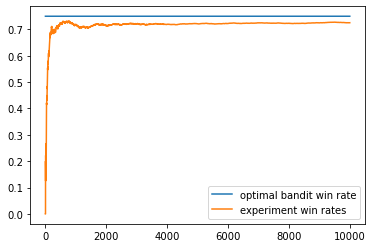

In [16]:
# finally we do a plot of win_rates
cumulative_rewards = np.cumsum(rewards)
# so win rates at time t, is total reward at time t / number of trials at time t 
win_rates = cumulative_rewards/(np.arange(NUM_TRIALS)+1)
plt.plot([np.max(BANDIT_PROBABILITIES)]*NUM_TRIALS,label='optimal bandit win rate')
plt.plot(win_rates,label='experiment win rates')
plt.legend()
plt.show()

In [17]:
# although the experimental win rate increases and converges over time
# it does not approach the maximum theoretical win rate

<h1>code</h1>

In [1]:
# now we want to know of what happens when we use different values of epsilon
# so we see how the outcome changes and we will be able to compare the results for different values of epsilon
# also, this time we will work with a real valued reward
# it will be gaussian distributed
# thats equivalent to saying our reward is sample fom , Reward ~ N(mu,sigma^2)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_TRIALS = 100000
EPSILONS = [0.1,0.05,0.01]
BANDIT_PROBABILITIES = [1.5,2.5,3.5]

In [3]:
def epsilon_greedy(eps,means):
    if np.random.random() < eps:
        return np.random.choice(len(means)),'explored'
    else:
        return np.argmax(means),'exploited'

In [4]:
class bandit:
    def __init__(self,p):
        self.p = p 
        self.mean = 0
        self.N = 0
        
    def pull(self):
        # sample from a guassian with mean mu
        return np.random.randn() + self.p
    
    def update_mean(self,x_n):
        self.N+=1        
        self.mean = self.mean + 1/self.N*(x_n-self.mean)

In [5]:
def experiment(true_means,epsilon):
    # we will collect these
    rewards = []
    num_explored = 0
    num_exploited = 0
    num_times_selected_optimal = 0
    bandits = [bandit(p) for p in true_means]
    optimal = np.argmax(true_means)
    for t in range(NUM_TRIALS):
        means = [b.mean for b in bandits]
        j,choice = epsilon_greedy(epsilon,means)
        if j == optimal:
            num_times_selected_optimal += 1
        if choice == 'explored':
            num_explored += 1
        else:
            num_exploited +=1 
        r = bandits[j].pull()
        bandits[j].update_mean(r)
        rewards += [r]
    # finally do the prints and plots
    print('Experiment with Epsilon = ',epsilon)
    for i,b in enumerate(bandits):
        print('mean estimate for bandit ',i,': ',bandits[i].mean,' actual mean : ',true_means[i]) 
    optimal_prob = np.max(true_means)
    expected_reward = NUM_TRIALS*optimal_prob
    print('total reward : ',sum(rewards),' Expected reward of optimal bandit : ',expected_reward)
    print('Number of times explored : ',num_explored,'Number of times exploited : ',num_exploited)
    print(num_times_selected_optimal)
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards/(np.arange(NUM_TRIALS)+1)
    plt.plot([np.max(true_means)]*NUM_TRIALS,label='Optimal bandit win rate')
    for i,m in enumerate(true_means):
            plt.plot([m]*NUM_TRIALS,label='Bandit '+str(i)+' win rate')        
    plt.plot(win_rates,label='experiment win rates')
    plt.legend()
    # this makes it so that the plot shows on a log scale rather than a linear scale
    # the reason for this is, these algorithms will converge quite fast
    # so its difficult to truly see the difference between each value of epsilon
    # using a log scale allows us to zoom in to the relevant parts of the plot
    plt.xscale('log')
    plt.show()    
    print('-----------------------------------------------------------------')
    # so that we can plot them for all experiments on one plot
    return win_rates

Experiment with Epsilon =  0.1
mean estimate for bandit  0 :  1.5309180815322518  actual mean :  1.5
mean estimate for bandit  1 :  2.4916451485442046  actual mean :  2.5
mean estimate for bandit  2 :  3.4963382088870163  actual mean :  3.5
total reward :  339707.4453442417  Expected reward of optimal bandit :  350000.0
Number of times explored :  10042 Number of times exploited :  89958
93332


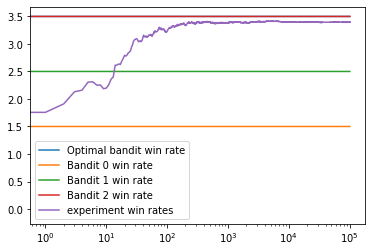

-----------------------------------------------------------------
Experiment with Epsilon =  0.05
mean estimate for bandit  0 :  1.5146024995197278  actual mean :  1.5
mean estimate for bandit  1 :  2.506955521424967  actual mean :  2.5
mean estimate for bandit  2 :  3.5004543619056308  actual mean :  3.5
total reward :  345090.77024259977  Expected reward of optimal bandit :  350000.0
Number of times explored :  4960 Number of times exploited :  95040
96669


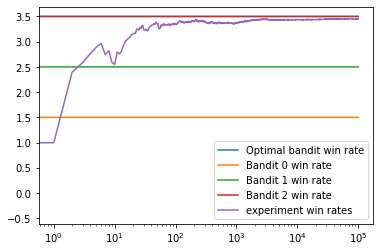

-----------------------------------------------------------------
Experiment with Epsilon =  0.01
mean estimate for bandit  0 :  1.552539197754233  actual mean :  1.5
mean estimate for bandit  1 :  2.563696159768447  actual mean :  2.5
mean estimate for bandit  2 :  3.5012169151322587  actual mean :  3.5
total reward :  348969.1517789495  Expected reward of optimal bandit :  350000.0
Number of times explored :  999 Number of times exploited :  99001
99105


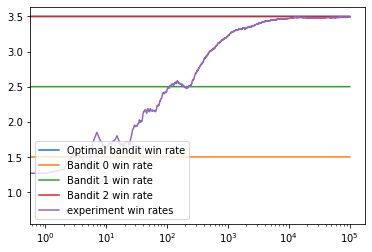

-----------------------------------------------------------------


In [6]:
win_rates_all = []
for epsilon in EPSILONS:
    win_rates = experiment(BANDIT_PROBABILITIES,epsilon)
    win_rates_all.append(win_rates)

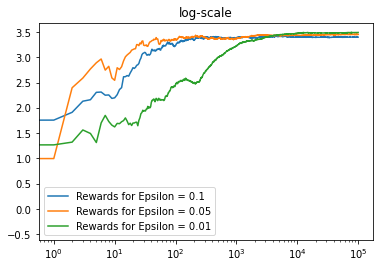

In [8]:
# now lets plot them all 
for wr,eps in zip(win_rates_all,EPSILONS):
    plt.plot(wr,label='Rewards for Epsilon = '+str(eps))

plt.xscale('log')
plt.title('log-scale')
plt.legend()
plt.show()

In [9]:
# we can see that for epsilon = 0.1 and 0.05
# they obtain a high accumulative reward much faster than epsilon = 0.01
# epsilon = 0.01 still converges, but does so more slowly

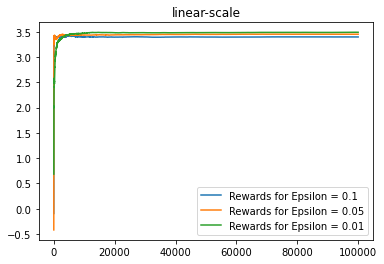

In [10]:
# agian on linear scale
for wr,eps in zip(win_rates_all,EPSILONS):
    plt.plot(wr,label='Rewards for Epsilon = '+str(eps))

plt.title('linear-scale')
plt.legend()
plt.show()

In [11]:
# on the other hand, if we look at the cumulative reward for epsilon
# the cumumalive reward for high values of epsilon are worse and worse
# so there is a trade-off here
# do we want a quick convergance or a high eventual rewards?

<h1>Math</h1>

In this section, we are going to talk about a different method of solving the explore exploit dilemma known as the optimistic initial values method

---

<h3>Optimistic Initial Values</h3>

The optimistic initial values method is an extremely simple modification of the purely greedy method

In other words, we don't even need any concept of epsilon and random exploration

The way it works is this, as we recall in our measurement of the sample mean we update our current estimate based on our previous estimate

Our initial estimate is zero to ensure that all the math works out and we get exactly the sample mean

The optimistic initial values method says this

What if instead of initializing the initial estimate to zero, we pick a really large value and include that in the estimate of the sample mean?

In this way, we're not really estimating the mean per say, we're actually overestimating the mean

BEFORE : initialised mean estimate to 0 (this is never used)

<img src='extras/52.9.PNG' ></img>

OPTIMISTIC: initialise mean to very large value (this is used)

<img src='extras/52.10.PNG' ></img>

---

<h3>Pseudocode</h3>

Just to be clear, let's look at some pseudocode for how this would work

First, we initialize our bandits to have their initial means to be very large values

As a side note, they must be finite because if you pick infinity, then we can't do any further calculations with it

Infinity plus anything is still infinity

Then inside our experiment, instead of doing any kind of random exploration, we simply choose the
bandit with the highest estimated mean 

Since we initialize this value to be very large, this isn't necessarily close to the true mean, but rather it's an overestimate of the true mean

```python
class Bandit:
    def __init__(self,p):
        self.p = p
        self.p_estimate = 10 # very large value
        
    # greedy loop
    for n in range(NUM_TRIALS):
        j = argmax(b.p_estimate for b in bandits)
```

---

<h3>Choosing the bandit</h3>

The next step is to consider the part of the code where we choose the bandit

As we mentioned earlier, we don't need to choose anything randomly

We can just act in a greedy manner and choose the bandit with the largest estimated mean

The question is, why does this even work?

Let's think about it

Remember that our goal is to balance exploration and exploitation

Exploration as the same as saying, we want to collect lots of data

So what happens with our estimated mean?

If it's early on in our experiment and we haven't collected a lot of data yet, then our estimated mean will be very large, not because the true mean is large, but because we set the initial value very large and that has yet to converge to the true mean

On the other hand, after we've collected lots of data, the estimated mean is going to get smaller
and smaller and smaller until we stop choosing that bandit

Remember that the sample mean is the arithmetic average of all the samples we collected

So even if we have one extremely large value, its effect is going to disappear when you have 1000 or 10000 samples

---

<h3>Will the sample mean converge?</h3>

One interesting question to ask ourselves is this 

In Epsilon greedy, we saw that our estimate of the mean for each bandit converged to the true means

Do we think this will happen with the optimistic initial values message?

In fact, the answer is no

Remember that since we're using the greedy method, there's no guarantee we will collect a large number of samples for any single bandit

What will happen is if the estimated means for the suboptimal bandits go below the estimated mean for the optimal bandit, we will stop exploring those suboptimal bandits entirely

And that's because we're being greedy

So the only result we can expect is that those estimated means are below the optimal bandits estimated mean

Not that they have converged to their true means

In fact, we can't even expect the optimal bandit to have a good estimate of the true mean because the initial value could have been so high and the number of trials is low enough that the estimated mean is still an overestimate by the end of the experiment

---

<h3>Role of Initial Value</h3>

The next question we want to address is what is the role of the initial value?

The intuition is hopefully clear by now

It's that if we set this value very high, then it'll cause the algorithm to explore, because the
greedy method will believe that the bandit it has high mean reward even when it doesn't

To determine the role of the initial value, we have to ask the question how high?

So if we set the initial value extremely high, then we're saying I want more exploration because
it's going to take more time for the estimated mean to go down towards its true mean

If we set the initial value only a little high, then we're saying I want just a tiny bit of exploration because it's going to take much less time for the estimated mean to go down towards its true mean

So the initial value is then a hyper parameter that controls the amount of exploration

High initial values mean more exploration and smaller initial values mean less exploration

But even when we set a small initial value, it still should be greater than the typical set of rewards we would get in order for this algorithm to work

<h1>Math</h1>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2,0.5,0.75]

# we will collect these
rewards = []
num_times_selected_optimal = 0

In [16]:
class bandit:
    def __init__(self,p):
        # we are going to have binary rewards
        # p is the probability of winning
        self.p = p 
        self.mean = 5 # very large value
        self.N = 1 # as if we took one sample
        
    def pull(self):
        return np.random.random() < self.p
    
    def update_mean(self,x_n):
        self.N+=1        
        self.mean = self.mean + 1/self.N*(x_n-self.mean)

In [17]:
bandits = [bandit(p) for p in BANDIT_PROBABILITIES]
optimal = np.argmax(BANDIT_PROBABILITIES)

In [18]:
for t in range(NUM_TRIALS):
    means = [b.mean for b in bandits]
    j = np.argmax(means)
    if j == optimal:
        num_times_selected_optimal += 1
    r = bandits[j].pull()
    bandits[j].update_mean(r)
    rewards += [r]

In [19]:
# now lets print the mean estimate for each bandit
for i,b in enumerate(bandits):
    print('mean estimate for bandit ',i,': ',bandits[i].mean,' actual mean : ',BANDIT_PROBABILITIES[i])

mean estimate for bandit  0 :  0.7142857142857143  actual mean :  0.2
mean estimate for bandit  1 :  0.7142857142857142  actual mean :  0.5
mean estimate for bandit  2 :  0.7483470246443575  actual mean :  0.75


In [ ]:
# very interesting
# if we look at the mean estimates, we can see that htey are not accurate at all
# except for the estimate of the optimal bandit
# why is that ?
# well remember tjat our algorithm is greedy
# we know that for the optimal bandit
# the estimated mean will slowly climb down from the initial value down to 0.75 eventually
# so if we start at 5, its going to go down from 5 to 0.5
# so what about the other bandits?
# If they go anywhere below that range, they are going to stop being selected
# thats because we are being greedy
# therefore, there is no opportunity for these bandits to actuially converge to their true means
# as soon as they go below 0.75, we stop choosing those bandits
# and therefore they stop getting updated

In [20]:
optimal_prob = np.max(BANDIT_PROBABILITIES)
expected_reward = NUM_TRIALS*optimal_prob
print('total reward : ',sum(rewards),' Expected reward of optimal bandit : ',expected_reward)

total reward :  7470  Expected reward of optimal bandit :  7500.0


In [21]:
print(num_times_selected_optimal)

9981


In [24]:
# over all, the optimal bandit is selected over 99% of the time
# the suboptimal bandits are selected about 10 times, which is about 0.1% of the time

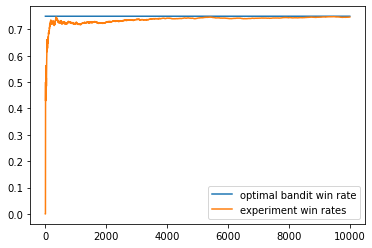

In [22]:
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards/(np.arange(NUM_TRIALS)+1)
plt.plot([np.max(BANDIT_PROBABILITIES)]*NUM_TRIALS,label='optimal bandit win rate')
plt.plot(win_rates,label='experiment win rates')
plt.legend()
plt.show()

In [23]:
# first we can see that 
# there is almost no gap between final experiment win rate and true optimal win rate
# so that an imporvement over what we have been doing before with a constant value of epsilon

<h1>Math</h1>

In this lecture, we are going to talk about another method of solving the explore exploit dilemma called UCB1 

---

<h3>UCB1</h3>

UCB stands for Upper Confidence Bound

If we think about the sequence of algorithms we've gone through, it kind of makes sense of why we go in this order 

In a very loose way, each of the ideas takes the previous idea and makes it a little more complex

Epsilon Greedy was our first algorithm that said, just have a small probability of exploration so that we would never get stuck with inaccurate maximum likelihoo  mean estimates 

Optimistic initial values takes that a step further by using a more natural kind of exploration 

Instead of just having a random probability of exploration, we just make the mean estimate artificially high so that each bandit gets chosen more often until we learn that the true mean is not actually that high

In this section, we'll take that a step further and ask, is there a way to think about this upper 
down in a more probabilistic way?

In other words, instead of trying to guess a good upper bound, can we use the rules of probability
to infer an upper bound?

---

<h3>Applying Probability</h3>

We alluded to the idea of confidence earlier, we want to be confident in our predictions and we know that in order to be confident in our predictions, we should collect lots of data 

When we collect more and more data, our confidence in the mean prediction gets higher and higher

Now, we might assume that this leads us naturally to confidence intervals, but we're going to go in a different direction

We're going to talk about inequalities 

Later, we will use confidence intervals again to build some intuition, but for now, let's work through some theory


$$\large \text{p(sample mean - true mean >= error) <= f(error)}$$

we're going to start with as few mathematical symbols as possible since it can be quite intimidating

So the inequality looks like this

It says the probability that the difference between the sample mean and the true mean is bigger than some error, is less than or equal to some function of that error

This function ($\text{f(error)}$) is typically a function that decreases as the value of the error gets larger 

That looks pretty complicated by itself, so let's break it down 

First, think about why the left side makes sense

Since we would need to collect an infinite number of samples for our sample mean to equal the true mean, there's going to be some error in our measurement

What do we want to ask is how big is this error?

Well, we can phrase this as a probability question

We can ask what's the probability that our error is bigger than some value and can we upper bound that probability?

We know the right side is an upper bound because the two sides are related by a less than or equal
to sign

---

<h3>Imaginary Example</h3>

Actually, at this point, it probably helps to use an actual variable and a made up function just
as an example

We can ask what is the probability that our measurement error is bigger than some value say $t$?

And just to be clear, $t$ must be positive 

so we can say

$$\large p(\text{sample mean - true mean} \ge t) \le \frac{1}{t}$$

Remember $\frac{1}{t}$ is just an example of a decreasing function, this is not necessarily true 

But let's think about why this would make sense

Let's say $t$ is a very small value, in that case, the right $\frac{1}{t}$ side becomes bigger 

That makes sense because the probability that our error is bigger than a very tiny value should get larger as that tiny value gets smaller

Conversely, let's say $t$ is a very large value that also makes sense because the probability that our error is bigger than a very large value should get smaller as $t$ gets larger

In other words, the probability of being larger than a large error is smaller and the probability of being larger than a small error is larger

So to summarize, we want to ask what is the probability that our error is bigger than some $t$?

And it turns out we can upper bound this probability as a decreasing function of $t$

---

<h3>Actual Inequalities</h3>

In fact, when we have a function on the right hand side, that decreases proportional $\frac{1}{t}$, that's the markov inequality

Yes, that's the same Markov we'll be talking about later when we talk about Markova decision processes

As we may have learned by now, Markov is a ubiquitous name in the field of probability and many fields that make use of it

There's another inequality called the Chebyshev inequality that decreases proportional to one over $\frac{1}{t^2}$

This would be considered better since the function on the right side decreases faster 

So we can guarantee that the error is below an even smaller number

Finally, we get to Hoefding's inequality, which is an even tighter bound

It decreases exponentially in $t^2$

$$\large p(\bar X_n - E(X) \ge t) \le e^{-2nt^2}$$

That's like a Gaussian curve, which decreases faster than any polynomial

The reason we're writing all the individual variables for the Hoeffding inequality is because this is the one we're actually going to use for UCB1

In any case, we would consider the math behind the UCB1 algorithm to be optional for this notebook, since while the math is kind of tricky, the algorithm itself is pretty easy to implement

So if we don't feel comfortable with this math, consider simply ignoring it and just implementing
the algorithm

---

<h3>Close Inspection</h3>

It may be useful to try to understand all of the symbols in this inequality, but again, this is optional and we're not really going to make use of that

This is just for our own understanding

So let's look a little more closely at each item

$$\large p(\bar X_n - E(X) \ge t) \le e^{-2nt^2}$$

First $\bar X_n$, is the sample mean of $X$ after we've collected N samples

$E(X)$ is the expected value of $X$, in other words, it's true mean

So $\bar X_n - E(X)$, is the error in our measurement of $E(X)$

$t$ is some arbitrary error value

What we can tell from this is as we collect more and more samples, the error gets smaller and smaller since the exponential function gets smaller as $n$ increases

So if we use this as a basic sanity check, everything seems good so far

---

<h3>Lets Skip Some Math</h3>

But again, that was just for some extra intuition, in fact, we're going to take this rare opportunity to skip over the math completely

Basically, what's going to happen is we're going to do a few probability manipulations and after a
bunch of hard work, you're only going to end up choosing our own heuristic anyway

Heuristic basically means just pick some function that seems to make sense, but doesn't have any foundation based on first principles

So it kind of doesn't make sense to go through a lot of principles, probability calculations, when
in the end we just end up picking a function at random

It's basically a hyper parameter

The specific type of parameter that we use is what makes this method UCB1

There are other kinds of UCB that are less popular and so are outside the scope of this notebook

If we want to look at the math behind UCB1 in depth, we're encouraged to check out the paper titled <strong>Finite Time Analysis of the Multi Armed Bandit Problem</strong>

So let's look at how it works and then we can talk about why it makes sense

---

<h3>Psuedocode</h3>

Basically, the idea is this looking at the pseudocode should be helpful, since we've seen other bandit algorithms before and they all just follow the same basic pattern

```
Loop:
```
$$j = \arg \max_j \left(\bar X_{n_j} + \sqrt{2\frac{\log N}{n_j}}\right)$$

```
# pull arm j, updata j's mean
```
So inside a loop, we choose using a greedy algorithm based on the sum of these two terms

The first term is the sample mean on bandit $j$

The second term is an error upper bound

We'll discuss where this formula comes from later

It's just like the optimistic initial values method, except that instead of using an optimistic estimate for the mean, we use the actual sample mean  plus some upper bound on the error

If we want, we can think of it as using the upper bound on the confidence interval as intuition

As we can see, this is still greedy with respect to the upper bound

---

<h3>Intuition: Confidence Intervals</h3>

So first, let's just think about the intuition in terms of confidence intervals, even though we know that's not exactly what we're doing

Why would using the upper bound on the confidence interval work in the first place?

As discussed, we're still going to act in a greedy manner with respect to this upper bound

This is still similar to how we use optimistic initial values

And so there are two cases to consider

The first case is where we haven't collected a lot of samples yet

So our estimate is bad and our confidence interval is large

In that case, we want to explore this bandit so that we can collect more samples

Using the upper bound of the confidence interval would be useful since it would be very high, and if we take the bandit with the maximum upper bound, then we can explore this bandit

The second case is where we've collected lots of samples

So our estimate is very accurate and we no longer need to explore this bandit

In that case, the only way we can explore this bandit is if it's true mean is actually high and is higher than the upper bounds on the other bandits

So we hope that's intuitive

Using the upper bound of a confidence interval will allow us to explore and exploit in a reasonable way

<img src='extras/52.11.PNG'></img>

---

<h3>Back to UCB1</h3>

Now, let's look at how it UCB1 in particular implements this strategy

$$j = \arg \max_j \left(\bar X_{n_j} + \sqrt{2\frac{\log N}{n_j}}\right)$$

Let's focus on the first term, the sample mean 

If we only look at this, how it works is obvious

If the sample mean is bigger, it makes this bandit more likely to be chosen, which is what we want

This would be the exploitation aspect

How about the second term 

Let's look at each of the terms inside the square root

It's important to differentiate between a $N$ and $n_j$

$N$ represents the total number of plays we have made so far

So if we played three bandits once each $N$, would be three

On the other hand, little $m_j$ represents the number of times we played bandit $j$ only

So if we played all three bandits once each, then little $n_j$ would be one for each of the bandits

Finally, we want to point out the strange constant $2$ 

In fact, this doesn't come from any probability derivation, this is just a hyperparameter

As we recall, we said that this is a heuristic

So if we made this constant bigger, then it would give us a larger upper bound

And if we made it smaller, then it would give us a smaller upper bound

---

<h3>Why does it work?</h3>

The next question to consider is, why does this even work?

Let's consider what happens to $N$ and $n_j$

Let's say we ignore bandit $j$ for a long time so that little $n_j$ is very small

Then $N$ will become larger and eventually the numerator will become bigger than the denominator, and this will make the upper bound large

Then we will choose bandit $j$ because it's upper bound is large, larger than all the other choices

On the other hand, let's say we have explored Banadit $h$ already so that $n_j$ is large, $N$ may be large too, but its effect on the upper bound is muted because of the log function

As we recall, the log function grows much more slowly than linear

So let's say we played Bandit $j$ 1000 times and we only played bandit $j$ all of those times

Then we get  $\frac{2 \times \log 1000}{1000}$, which is approximately equal to $0.01$

So as we can see, as these values grow, the denominator overtakes the numerator and the upper bound shrinks down to zero, and all we're left with is the actual means, which is what we want

That makes sense, because after we collected lots of data, our estimates are accurate and there's no need to explore further

In general, 

$$\large \lim_{n \rightarrow \infty} \frac{\log n}{n} = 0$$

---

<h3>Where does the upper bound come from?</h3>

Now, although we said earlier that we consider all the math to be optional, we do want to consider the question, where does this upper bound come from?

Intuitively, we can take the right side of the Hoeffding's inequality, and realize that if you take the log of both sides and solve for $t$, we get the square root of the log divided by $n_j$ the number of samples collected

$$\large p= e^{-2n_{n_j}t^2} \iff t = \sqrt{\frac{-\log p}{2n_j}}$$

We can just set this upper bound to be some letter called $p$ just so we can give it a name

UCB1 just says that as a heuristic, let's take the numerator to be for $4 \log N$, which means that we want $p = N^-4$ 

so $-\log p = - \log N^{-4} = 4 \log N$, the $4$ cancels out the $2$ in the denomenator, and we get our expression

In other words, we want that probability upper bound to drop off as $\frac{1}{N^{-4}}$

---

<h3>Additional Detail</h3>

OK, so finally, we want to discuss one small detail about the pseudocode that we may have missed

Our upper bound contains the ratio log $N$ divided by $n_j$, but what happens if $n_j$ equals the zero?

And on top of that, what if $N$ is also zero?

There are a few ways to hack around this

One method that actually makes sense is to just consider zero on the denominator with a positive numerator as a calculus limit

In that case, our upper bound is infinity and therefore we are guaranteed to select this bandit

Of course, we have to ignore the first few values since log of zero over zero is minus infinity and
then log of one over zero is zero or zero, but that would only be on the first few iterations

Instead, we found that what the authors did in their original paper was the simplest solution

It says that there's an initialization step for the algorithm where we just play all the bandits once

Then our $N$ just starts out as the number of bandits and $n_j$ is just one for each bandit

<img src='extras/52.12.PNG' width='500'></img>

<h1>code</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_TRIALS = 10000
BANDIT_PROBABILITIES = [0.2,0.5,0.75]

# we will collect these
rewards = []
num_times_selected_optimal = 0

In [3]:
class bandit:
    def __init__(self,p):
        self.p = p 
        self.mean = 0 
        self.N = 0
        
    def pull(self):
        return np.random.random() < self.p
    
    def update_mean(self,x_n):
        self.N+=1        
        self.mean = self.mean + 1/self.N*(x_n-self.mean)


In [4]:
bandits = [bandit(p) for p in BANDIT_PROBABILITIES]
optimal = np.argmax(BANDIT_PROBABILITIES)

In [5]:
# initialisation step, play each once
for b in bandits:
    r = b.pull()
    b.update_mean(r)
    rewards += [r]

In [6]:
for t in range(len(bandits),NUM_TRIALS):
    means = [b.mean for b in bandits]
    ucbs = [b.mean + np.sqrt(2*np.log(t)/b.N) for b in bandits]
    j = np.argmax(ucbs)
    if j == optimal:
        num_times_selected_optimal += 1
    r = bandits[j].pull()
    bandits[j].update_mean(r)
    rewards += [r]    

In [7]:
for i,b in enumerate(bandits):
    print('mean estimate for bandit ',i,': ',bandits[i].mean,' actual mean : ',BANDIT_PROBABILITIES[i])

mean estimate for bandit  0 :  0.18367346938775514  actual mean :  0.2
mean estimate for bandit  1 :  0.4638554216867471  actual mean :  0.5
mean estimate for bandit  2 :  0.7542156361778212  actual mean :  0.75


In [12]:
# if we look at the mean estimates 
# we can see that unlike the optimistic initial values method
# this method gives us estimates that are pretty accurate for all of the badnits
# instead of just the optimal one
# this would suggest that we probably played these bandits more than we should have

In [8]:
optimal_prob = np.max(BANDIT_PROBABILITIES)
expected_reward = NUM_TRIALS*optimal_prob
print('total reward : ',sum(rewards),' Expected reward of optimal bandit : ',expected_reward)

total reward :  7466  Expected reward of optimal bandit :  7500.0


In [9]:
print(num_times_selected_optimal)

9784


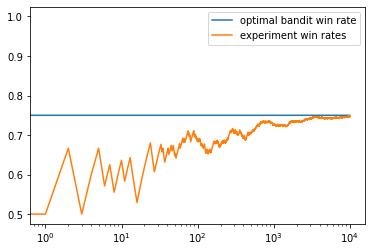

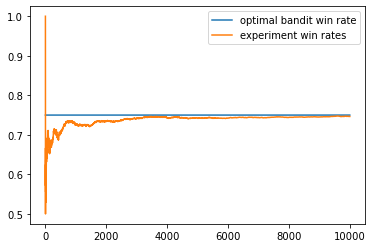

In [11]:
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards/(np.arange(NUM_TRIALS)+1)
plt.plot([np.max(BANDIT_PROBABILITIES)]*NUM_TRIALS,label='optimal bandit win rate')
plt.plot(win_rates,label='experiment win rates')
plt.xscale('log')
plt.legend()
plt.show()
plt.plot([np.max(BANDIT_PROBABILITIES)]*NUM_TRIALS,label='optimal bandit win rate')
plt.plot(win_rates,label='experiment win rates')
plt.legend()
plt.show()

In [13]:
# so as we can see our algorithm eventually converges to the optimal bandit
# and the optimal bandit reward

<h1>Math</h1>

In this section, we are going to look at a new algorithm that makes use of Bayesian statistics 

---

<h3>Bayesian Bandits / Thompson Sampling</h3>

Some people like to refer to this algorithm as the Bayesian bandit algorithm 

To begin this discussion, we want to recall the digression we made into confidence intervals

The confidence interval is a nice, intuitive tool for us, because even though we're not going to actually use it, it provides us with a nice picture

It kind of exemplifies the explore exploit dilemma

When we have only a small amount of data, the confidence interval is large and when we have a large amount of data, the confidence interval is small 

When the confidence interval is fat, that means we should explore more when the confidence interval is skinny, that means we should explore less

We should exploit it when the confidence interval is skinny and has a high value

What's good about the confidence interval is that it tells us in a sort of roundabout way where the
true meaning could possibly be

If we look at this fat confidence interval

<img src='extras/52.13.PNG' width='300'></img>

that means the true meaning it could be here 

<img src='extras/52.14.PNG' width='300'></img>

or it could be over here 

<img src='extras/52.13.PNG' width='300'></img>

Because these areas have probability mass, these are not improbable locations where one might find the true mean

---

But let's ask ourselves a question, why is the confidence interval symmetric, why does it always have this bell shaped curve?

In fact, that's because confidence intervals are based on the central limit theorem, which says that sums of random variables tend to a normal distribution

Since this section is about the Bayesian approach, we are not going to use confidence intervals because that's a classical frequentist approach

However, the concept of confidence intervals gives us intuition

What we really want when we look at a graph like this is the distribution of the true mean 

Bayesian machine learning gives us the tools we need to calculate this, because in the Bayesian paradigm, everything is a random variable, even the parameters of distributions

That means whereas before we said that the reward came from some distribution with some mean, now we are seeing that mean also comes from some other distribution, since everything is a random variable, everything has a distribution.

---

<h3>Bayes Rule</h3>

In order to determine the distribution of the mean, which we're going to call $\theta$, we have to structure the problem in terms of a Bayesian statistics problem

The quantity we're looking for is $p(\theta \vert X)$, where $\theta$ is the mean of the Bernoulli random variable $X$ and the $X$ inside this expression refers to the data we've collected 

For convenience, we'll conflate the two but realise that these are overloaded symbols

When we use $X$, we could be referring to the random variable or we could be referring to the data we've collected

Just pay attention to the context and we shouldn't have any issues

Of course, the place we start from in Bayesian statistics is Bayes Rule

$$\large p(\theta \vert X) = \frac{p(X \vert \theta)p(\theta)}{p(X)}$$

On the left hand side, we have $p(\theta \vert X)$, which is a distribution we call the posterior

On the right, we have three items, $p(X \vert \theta)$ is called the likelihood, the same likelihood we would use in a maximum likelihood estimation

We could interpret that as the probability of the data given the parameter $\theta$

$p(\theta)$ by itself is called the prior, it's the distribution of $\theta$ when we don't know anything about $X$, or in other words, when we haven't collected any data 

$p(X)$ on the denominator is called the evidence

Since we're trying to find $p(\theta \vert X)$, which is a distribution over the random variable $\theta$, it turns out that $p(X)$ is constant with respect to $\theta$ and therefore we can write this as a proportionality instead of an equation

---

<h3>Why Proporionality?</h3>

So why would we want to get rid of the evidence and turn this into a proportionality?

$$\large p(\theta \vert X) \propto p(X \vert \theta) p(\theta)$$

Well, in general, we don't know this denominator and it's intractable or infeasible to calculate

As we recall, we can express the denominator as an integral over the numerator, since they both express the joint probability over $X$ and $\theta$

Since $\theta$ is a continuous random variable, we integrate instead of summing

$$\large p(\theta \vert X) = \frac{p(X \vert \theta) p(\theta)}{\int p(X \vert \theta) p(\theta) d\theta}$$

The problem is, if we remember from our calculus II studies, that integration is very hard

It's not just a matter of mechanically applying a set of rules like differentiation

As a side note, we may have heard of Montecarlo methods as a way to approximate this integral

However, as we know, these Bandit methods are designed to run in real time and therefore it's also not feasible to run a Monte Carlo simulation to obtain an answer

---

<h3>Conjugate Priors</h3>

The trick in Bayesian statistics is there are special pairs of distributions where we can take advantage of the proportionality and ignore the evidence

These are called conjugate pairs

And in this context, the prior would be called the conjugate prior

The basic story is this

In probability, we pretty much use a fixed set of common distributions

We have the Gaussian, the Bernoulli, the Binomial, the Poisson and so forth

In general, the posterior doesn't fit nicely into one of these common distributions

For example, we can't say if our likelihood is a Gaussian and our prior is a uniform, then our posterior will be a Gaussian, that won't work

However, conjugate priors are special

They are special because when we combine the prior and the likelihood to get the posterior, the posterior comes from the same kind of distribution as the prior

So if our prior is a Gaussian, then our posterior will also be a Gaussian

This is contingent on the fact that our likelihood matches the prior such that they are conjugate

So we can't pick any old likelihood this only works for certain distributions

---

<h3>Reminder: Bernoulli Likelihood</h3>

So what distributions are we interested in?

As we know, our likelihood is a Bernoulli 

Given a set of coin tosses $x_1$ one up to $x_N$, we can express the likelihood as the product of PMFs of each $X$

In this instance, we are using $\theta$ to represent the Bernoulli parameter

So if we plug this into the PMF for the Bernoulli, we get 

$$\large X = \{x_1,x_2,\cdots,x_N\}$$

$$\large p(X \vert \theta) = \prod^N_{i=1} \theta^{x_i}(1-\theta)^{(1-x_i)}, x_i \sim \text{ Bernoulli}(\theta)$$

---

<h3>Bernoulli Conjugate Prior</h3>

Well, it turns out that if we choose our prior to be the $\beta$ distribution, this is a conjugate prior for the Bernoulli likelihood 

In the next few subsections, we are going to show that that's the case

By the way, just so that the $\beta$ doesn't seem like a completely arbitrary choice, it does make sense

We know that in a win or lose situation where the reward is only binary, the mean of that distribution must be a number between zero and one

It turns out that the support of the beta distribution is in the range zero to one, so that checks out

We can start by writing down the numerator of the posterior, which is the joint distribution between $\theta$ and $X$, $p(X \vert \theta) p(\theta)$

$$\large p(\theta \vert X) \propto p(X \vert \theta)p(\theta) = \left(\prod^N_{i=1} \theta^{x_i} (1-\theta)^{(1-x_i)}\right) \left(\frac{1}{B(\alpha,\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}\right)$$

so we just replace $p(X \vert \theta)$ by equation of Bernoulli distribution, and $p(\theta)$ by equation of $\beta$ distribution

In the expression for the $\beta$ distribution, we have two parameters, $\alpha$ and $\beta$ 

These are the parameters of the $\beta$ distribution

<img src='extras/52.17.PNG' width='350'></img>

The $B$ function is called the beta function, and it's equal 

$$\large B(\alpha,\beta) = \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)}$$

$\Gamma$ itself is a special function which turns out to be a fancy integral, but basically we can think of it as a generalisation of the factorial function for non integer numbers

In actuality, the gamma function is defined for both real and complex numbers, although that would be outside the scope of this notebook

In any case, we actually never have to worry about computing the $\beta$ function, as we'll soon see

---

<h3>Soma Algebra</h3>

So why do we like expressions like this in Bayesian and machine learning?

Well, if you look closely, we see that both $\theta$ and $1-\theta$ appear in the base of both the prior and the likelihood

$$\large p(\theta \vert X) \propto p(X \vert \theta)p(\theta) = \left(\prod^N_{i=1} \theta^{x_i} (1-\theta)^{(1-x_i)}\right) \left(\frac{1}{B(\alpha,\beta)} \theta^{\alpha-1}(1-\theta)^{\beta-1}\right)$$

In addition, since the $B$ function is constant with respect to $\theta$, it can be dropped out of the proportionality

$$\large p(\theta \vert X) \propto p(X \vert \theta)p(\theta) = \left(\prod^N_{i=1} \theta^{x_i} (1-\theta)^{(1-x_i)}\right) \left(\theta^{\alpha-1}(1-\theta)^{\beta-1}\right)$$

To make this clear, we can first bring the product into the exponent and turn it into a sum :o

So we get the sum over $x_i$s and the sum over $1-x_i$s 

$$\large p(\theta \vert X) \propto p(X \vert \theta)p(\theta) = \left( \theta^{\sum\limits^N_{i=1}x_i} (1-\theta)^{\sum\limits^N_{i=1}(1-x_i)}\right) \left(\theta^{\alpha-1}(1-\theta)^{\beta-1}\right)$$

Then we can combine all the $\theta$ terms and all the $1-\theta$ terms until we just get a single $\theta$ term and a single $1-\theta$


$$\large p(\theta \vert X) \propto p(X \vert \theta)p(\theta) = \left( \theta^{\alpha-1 + \sum\limits^N_{i=1}x_i} (1-\theta)^{\beta-1+\sum\limits^N_{i=1}(1-x_i)}\right) $$

---

<h3>This is a beta distribution</h3>

But here's the trick, as we can see, this posterior is in exactly the same form as a $\beta$ distribution

which, as we recall, is the same kind of distribution we chose for the prior

This is because the $\beta$ distribution has the form 

$$\large f(\theta;\alpha,\beta) = \text{const} \times \theta^{\alpha-1}(1-\alpha)^{\beta-1}$$


Our posterior Beta

$$\large p(\theta \vert X) \propto \theta^{\alpha - 1 + \sum\limits^N_{i=1} x_i}(1-\theta)^{\beta-1+\sum\limits^N_{i=1}(1-x_i)}$$

We never have to worry about what that constant actually is, since it's just whatever the value needs to be so that the PDF integrates to one

So unless for some reason we need to compute that value, its actual value is unnecessary

In conclusion, we can say that the posterior for $\theta$, given some dataset $X$ is a $\beta$ distribution 

$$\large p(\theta \vert X) = \text{Beta}\left(\alpha+\sum^N_{i=1}x_i,\beta + N - \sum^N_{i=1} x_i\right), \text{If} p(\theta) = \text{Beta}(\alpha,\beta)$$

This is contingent on the fact that the prior is a beta with parameters $\alpha$ and $\beta$, and that the likelihood is a Bernoulli

---

<h3>Choosing a Prior</h3>

One part of the process that we can't forget about in a Bayesian machine learning is how to choose the value of $\alpha$ and $\beta$ in the first place

This defines the shape of our prior distribution

Although there are many interesting shapes the $\beta$ distribution can have, we are fortunate that the $\beta$ distribution is expressive enough to give us something that makes a lot of sense, and that is the uniform distribution 

$\beta(1,1)$ just happens to be a uniform distribution, and this usually makes a good choice for the beta prior

It says that we have no clue what the result may be, and so we assign equal probability to every possible value 

As a side note, if we come from an industry where you do actually have prior knowledge, then we should make use of that knowledge

For example, we know that clickthrough rates on ads are usually very small, around $1 \%$ or
$2 \%$

So if we have that knowledge due to domain expertise, then it should be encoded into our prior

---

<h3>Updating the posterior in prctice (N=1)</h3>

One minor point of confusion for students is how to update the posterior when it comes to the actual bandit problem

Recall that in the bandit problem, we update our model after every sample $x$ is collected

So unlike in our theoretical calculation, we never have $N$ samples, we always just have one sample

Of course, over the course of an experiment, we may collect many samples

The trick is that in Bayesian machine learning, what we consider the posterior in one step actually becomes the prior in the next step

So here's an example of how we can do this update over several time steps

We start with a prior battle, $\beta(1,1)$, the uniform distribution.

Next, we pull the arm and we get $x=1$

The posterior, therefore, is $\beta(1+1,1+1-1) = \beta(2,1)$

On the next pull, $\beta(2,1)$ to one becomes the prior

Now let's say we pull one again, so $x=1$ 

Now our new posterior is $\beta(2+1,1+1-1)$ which is $\beta(3,1)$

So this is our new posterior, but on the next step, $\beta(3,1)$ becomes the prior

So let's say on the next poll, we get $x=0$, then our posterior is now $\beta(3+0,1+1-0) = \beta(3,2)$

<img src='extras/52.16.PNG' width='700'></img>

So just keep this in mind, when we're coding that in Bayesian statistics and Bayesian machine learning, we usually define the posterior in terms of several samples while in applications with online updating, usually we're computing the posterior in terms of a single sample

<h1>Math</h1>

In this sction, we are going to continue our discussion of the Bayesian bandit algorithm

---

<h3>Bayesian Bandits / Thompson Sampling (pt 2)</h3>

Previously, we covered the fundamentals, such as conjugate priors and how to update the prior to obtain the posterior after collecting data 

In this section We are going to discuss how to actually use this in an algorithm 

To start, we're going to again return to our intuitive picture of confidence intervals, except now we're not going to use confidence intervals anymore

Instead, now that we know about posteriors and the Bayesian paradigm, we can plot exact posteriors and come to the same conclusions

As we know, this posterior represents our belief about the distribution of $\theta$, the mean of a bandit 

Theoretically, $\theta$ could be anywhere in this range, although obviously the areas with more probability mass are more probable

---

<h3>Picking the bandit</h3>

The Bayesian method involves a different strategy than what we previously used, which was basically to use an upper bound

Instead, what we are now going to do is simply draw a sample from this distribution

This method is also called <strong>Thompson sampling</strong>

This should make a lot of sense once we think about it

what is a distribution in the first place?

It tells us what values a random variable is likely to take on

By drawing samples from this distribution, we're saying, give us a value from this distribution and let that determine which band we choose

Instead of just using one value, which is the upper bound, we can use all of its values by drawing samples

As we draw more and more samples, this distribution will become skinnier and skinnier as we get more and more confident in our belief of where the true mean lies

When we draw a sample from a very skinny distribution, we're going to get a value very close to the center and it will be as if we were just comparing each bandit by their actual means

<img src='extras/52.18.PNG' width='600'></img>

If we don't understand this right away, we'll be looking at this same idea a few more times from a
variety of perspectives

Just remember the main fact, which is that instead of using some kind of upper bound, we pick randomly from any value that the mean can take on according to the posterior distribution

---

<h3>Pseudocode</h3>

The pseudocode is another perspective that makes the idea clear 

```python
class Bandit:
    def sample():
        return beta(a,b).sample()
    def update(d):
        a=..., b=...
    
for n in rante(NUM_TRIALS):
    j = argmax(b.sample() for b in bandits)
    x = bandit[j].pull()
    bandit[j].update(x)

```

Inside the band class, we define a new function called sample, which just returns a sample from the beta distribution given by its current values of $a$ and $b$

We use $a$ and $b$ here instead of $\alpha$ and $\beta$, since normally in programming we use ASCII characters

As we can see, when we choose our bandit, we take the argmax with respect to the sample

This is opposed to our previous algorithms when we took the arguments with respect to an upper bound

It's like saying be greedy, but with respect to samples from the posteriors rather than some statistic estimated from the samples

---

<h3>Example Scenarios</h3>

The next thing we think is useful to do is to look at graphs of the posteriors and reason about how they will change as we collect our samples

Let's start by looking at a common scenario where we have one skinny posterior and one fat posterior

<img src='extras/52.19.PNG' width='350'></img>

With the skinny posterior, when we sample from this distribution, the range of values we can get is pretty narrow 

For the fat distribution, when we sample, we can potentially get a lot of different values

As we can see, there is some chance of the sample from the fat distribution to be greater than the sample from the skinny distribution

But there's also a decent chance of the sample from the fat distribution to be less than the sample from the skinny distribution

Let's suppose that we draw a sample from each band and that the sample from the fat distribution turns out to be larger 

Since the fat distribution gave us a larger sample, that means we are now going to pull that bandit arm

So let's say we play that bandit and we win so that we get $x=1$

Then when we update our fat distribution, two things happen

First, it gets a little skinnier because we become more confident in our mean estimate

In addition, its peak moves up a bit since getting a one increases the mean

<img src='extras/52.20.PNG' width='350'></img>

---
Next, let's consider the situation where we sampled from the fat distribution and it turns out to be larger

<img src='extras/52.19.PNG' width='350'></img>

But when we pull the its arm, we get $x=0$ 

In this case two things happen

First, it still gets a little skinnier because whether we win or lose, we still obtain a sample and therefore we become more confident in our mean estimate it

But instead of the peak moving up now, the peak moves down since a $0$ would decrease the mean

<img src='extras/52.21.PNG' width='350'></img>

---

Let's consider another scenario where we again have a fat bandit and a skinny bandit, but this time the fat bandit's distribution is such that most of the probability mass is less than where the skinny bandit's distribution is

<img src='extras/52.22.PNG' width='350'></img>

What happens when we draw a sample?

Well, it doesn't matter what we draw for the fat bandit, really, because most of those samples will be less than the sample from the skinny bandit and therefore we won't end up playing that arm very often

And that's a good thing

Why is that a good thing?

There are two things to pay attention to

First, it's mean, and second, it's fatness

As we can see, it's mean is low

Therefore, we don't want to play this bandit because it's suboptimal and doesn't yield a reward as often as the skinny bandit 

Second, because it's fat, that means we have low confidence in our estimate, which also means we haven't collected a lot of data on this bandit

And that's a good thing

Why is that a good thing?

Again, because it's a suboptimal bandit, so we don't actually want to play this bandit

So in this situation, Thompson sampling is protecting us from playing that bandit and we don't actually want to play it because it's suboptimal

Compare that to Epsilon-greedy , where we would continue to play that bandit anyway, since our choice would be uniform random

---

<h3>Demo of Actual Code</h3>

To solidify these concepts, we're going to look at a demo of the Bayesian bandit method in action

We'll also get to code this ourselves, so this is a preview of what we will be making

This is the same script we'll be looking at later, so we're kind of presenting it in a reverse order and what we usually do, that is to look at the results before looking at the code

So if we run this script, here's what we would get at the fifth iteration

<img src='extras/52.23.PNG' width='400'></img>

As we can see, the 0.2 bandit has won 0/2 times

The zero 0.5 Bendit has wom 0/1 time

And the 0.75 bandit has won 2/2 times

And this leads to the distributions on the mean that we see 

For the 0.2 bandit, more probability mass is concentrated near the zero side 

For the 0.5 bandit probability mass is concentrated near the zero side as well but this is more pronounced for the 0.2 bandit because it has lost more times and therefore we're more confident that is mean is closer to zero

---

Here's the distribution after 10 trials 

<img src='extras/52.24.PNG' width='400'></img>

As we can see, the 0.2 bandit still only has 0/2 of two wins

That means in the last five trials, it was never selected

That makes sense since sampling from a distribution where most of the probability mass is near zero, we'll give us a smaller number

And since the samples were smaller, we didn't select that bandit

We can see that both the 0.5 bandit and the 0.75 bandit that have been updated

The 0.5 bandit has now won and the 0.75 bandit has now lost

That changes their distributions to now look more like bumps rather than monotonically increasing or decreasing slides

So why do we get bumps instead of slides?

Let's take the 0.75 bandit, for example, before most of the probability mass was at the value 1 because we had only ever gotten ones in the data

But now that we've gotten to zero, the probability that the mean is truly one is zero

That's because if the machine was $100 \%$, then we should win $100 \%$ of the time

So the Bayesian update is very logical

Previously, we believed that the mean it could possibly be $100 \%$

But now that we've lost, we know that the mean being $100 \%$ is impossible

The same thing happened to the 0.5 bandit

Most of its probability mass was at $0 \%$ because we only ever lost, but now that we've won, we know that the probability of the win rate for that bandit cannot possibly be $0 \%$

That is now an impossible inference

The probability for the 0.5 bandit and the 0.75 bandit both go down to zero at zero and one, because if we can win and we can lose, then we know that those win rates are impossible

---

Now we see the distribution at 20 trials

<img src='extras/52.25.PNG' width='400'></img>

As we can see, most of the probability mass for the optimal bandit is concentrated much higher than the mass for the other two bandits

So when we draw samples from these distributions, the optimal bandit gets selected a lot more often

It's still not impossible, but it's getting more and more unlikely

The count on the number of times the optimal bandit was selected is growing the fastest and the worst bandit still has not been selected

---

Here's the distribution at 50 trials

<img src='extras/52.26.PNG' width='400'></img>

Pretty much the same story as at 20 trials

We can see that for the optimal Bendit, the distribution is getting skinnier and taller because more of its probability mass is being centered around the true mean

We are becoming more confident in that estimate as we collect more data

On the other hand, our estimates for the other bandits are still not confident, and that's a good thing because they are suboptimal

---

Here's the distribution at 100 trials

<img src='extras/52.27.PNG' width='400'></img>

Again, more of the same pattern

---

At 200 trials, we see something a little interesting

<img src='extras/52.28.PNG' width='400'></img>

Although the bandit distributions generally still have the same shape, we see that the worst bandit has been selected one more time

It's win rate is now 0/3

But keep in mind, it was only selected once out of one hundred times

So it just so happened that one set of those 100 times, the sample that we got from the 0.2 bandit was higher than the samples from the other bandits

However, since we lost again, its distribution is now more peaked around zero and we will be less likely to pick it again in the future

---

At 500 trials, we essentially see the same thing

<img src='extras/52.29.PNG' width='400'></img>

The 0.75 bandit gets played a lot more 

The 0.5 bandit gets played a bit

And surprisingly, even the 0.2 bandit gets played once

However, notice that the probability of being selected is much lower 

Before we chose that 1/100 times

But in between the last plot and this plot, we played 300 times

So now it's become 1/300

---

Now we're at 1000 trials 

<img src='extras/52.30.PNG' width='400'></img>

Again, the 0.75 bandit is played most often 

And the 0.5 bandit is played a bit 

And even the 0.2 bandit was played twice

However, notice that we ended up winning one of those times, which eliminates the possibility of its winning rate being zero

So now even this distribution turns from a slide into a bump

Notice that the 0.75 five bandit has a very tall and very skinny distribution at this point, and the other two bandits remain short and fat

Let's look at the number of times the suboptimal bandits were played so that we can compare them to the next plot

So the 0.2 bandit has been played 6 times and the 0.5 bandit has been played 25 times

---

Here we are at 1500 trials

<img src='extras/52.31.PNG' width='400'></img>

We can see that the 0.2 bandit has not been played any times in the past 500 trials and the 0.5 bandit has been played once

This would be the correct thing to do since those bandits are suboptimal and now we are pretty confident of this fact given our posterior distributions

---

This is our final plot at 1999 trials

<img src='extras/52.32.PNG' width='400'></img>

As expected, the posterior distribution for the 0.75 bandit has gotten even taller and even skinnier

And this bandit has been played for a large majority of the last few hundred trials

Interestingly, we see that the 0.2 bandit got played once more, even though the 0.5 bandit didn't

---

<h3>Summary</h3>

Let's summarize the Thompson sampling method since while we think it's very intuitive, it also has the most theory out of all the bandit algorithms 

We started with the intuitive idea that we're interested in something like the confidence interval of our win rate estimate

This perfectly encapsulates the explore, exploit dilemma 

When the confidence interval is fat, we want to explore to improve our confidence interval when confidence intervals are small, we want to exploit this fact by choosing the bandit with the highest mean, which we are now confident about

But confidence intervals are based on the central limit theorem, and they do not accurately portray
the true distribution of the bandit win rates

Instead, the Bayesian method is to treat the win rate as a random variable, which is to give it its own distribution

In general, computing a posterior from Bayes rule is not easy because they usually involve intractable sums or unsolvable integrals

We use Conjugate Priors to show that instead of calculating the posterior by hand, we can instead
use proportionality to prove that the shape of the posterior fits some particular distribution and from there the normalizing constant can be found since the integral of any distribution must equal to one

Next, we introduced the Thompson sampling algorithm, which says that in order to choose a bandit just rank each bandit based on samples drawn from their posteriors

We saw that over time, this does exactly what we want

When distributions are fat, we explore more

And when distributions are skinny, we explore less

But importantly, when the optimal distribution becomes skinny, we can leave the suboptimal distributions fat, since in this scenario the optimal bandit still usually has the highest sample

This leads to us choosing the optimal bandit more, which is how we exploit

---

<h3>Which should we choose?</h3>

One final question we want to answer is, out of all these methods we discussed, which one should we use in practice?

They all seem equally easy to implement and only the algorithms and reasoning behind them is different

It all comes down to our rule

Machine learning is experimentation, not philosophy

In order to choose the best algorithm, we should experiment and collect data so that we have a definitive answer for our particular dataset

We don't want to do something like, say, such and such work better for BuzzFeed, therefore, we think it will also work better for us

What if our problem looks nothing like BuzzFeed's problem?

But that's not to say that if it works for BuzzFeed, it won't be a useful data point

It certainly is, and it does give us more confidence that it will work for us

And keep in mind that while we were doing a very simple simulation in this notebook, real world problems may have hundreds or thousands of choices 

When the dimensionality of the problem increases, that could possibly change the characteristics of these algorithms

On the other hand, because bandit algorithms are so simple to implement and so popular, we can draw on the experiences of many other companies in the industry

So it's good to use the experiences of others in aggregate

All this is to say that Thompson's sampling seems to be the winner in many experiments done by those in the industry

So that's why we've been building up our bandit algorithms in order to eventually get to this point

At the same time, in reinforcement learning algorithms are usually discussed in the context of using Epsilon greedy for balancing the explore, exploit, trade off

So just keep that in mind 

while you could apply these algorithms to the techniques we'll discuss in the future, it's not conventional

<h1>code</h1>

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

In [47]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2,0.5,0.75]

# we will collect these
rewards = []
num_times_selected_each = [0]*len(BANDIT_PROBABILITIES)

wins = [0]*len(BANDIT_PROBABILITIES)

print_epochs = [5,10,20,50,100,200,500,1000,1500,2000]

In [48]:
class bandit:
    def __init__(self,p):
        self.p = p 
        self.N = 0 # no particular need, but we will use it in plot
        self.a = 1
        self.b = 1
        
    def pull(self):
        return np.random.random() < self.p
    
    def sample(self):
        return np.random.beta(self.a,self.b)
    
    def update(self,x):
        self.N += 1        
        self.a += x
        self.b += 1-x

In [49]:
bandits = [bandit(p) for p in BANDIT_PROBABILITIES]

In [50]:
def plot_dist(bandits,wins,t):
    x = np.linspace(0, 1, 200)
    for band,w in zip(bandits,wins):
        dist = beta.pdf(x,band.a,band.b)
        data = 'true mean: ' + str(band.p) + ' wins: ' + str(w) + '/' + str(band.N)
        plt.plot(x,dist,label=data)
    plt.title('Bandit distributions after ' + str(t) + ' iterations')
    plt.legend()
    plt.show()

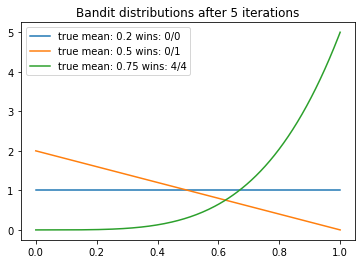

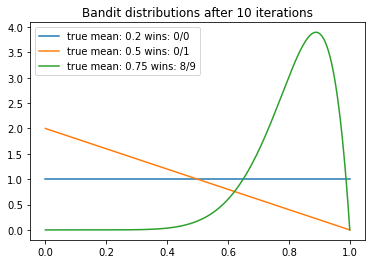

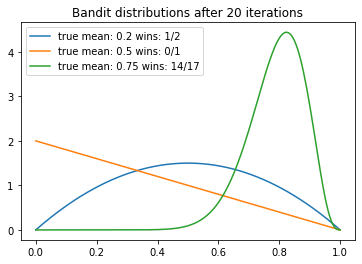

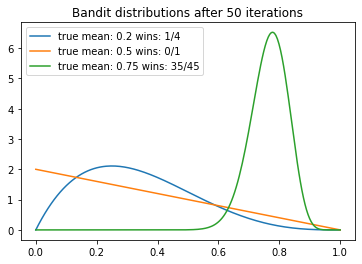

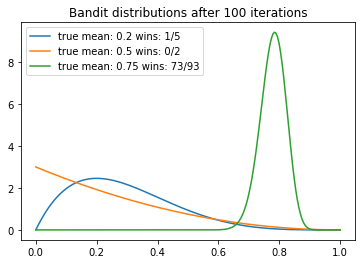

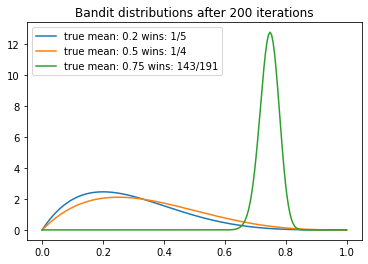

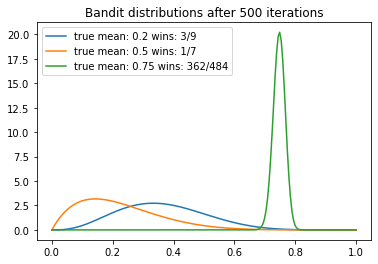

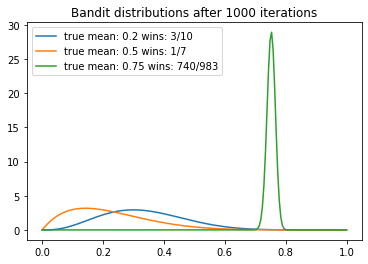

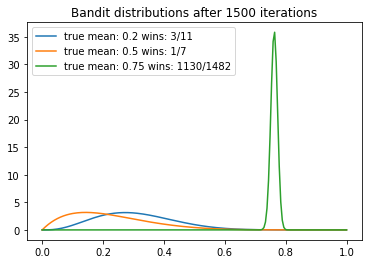

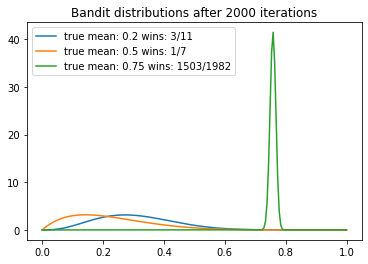

In [51]:
for t in range(NUM_TRIALS):
    samples = [b.sample() for b in bandits]
    j = np.argmax(samples)
    num_times_selected_each[j] += 1
    r = bandits[j].pull()
    bandits[j].update(r)
    rewards += [r]
    if r == 1:
        wins[j] += 1
    # plot every
    if (t+1) in print_epochs:
        plot_dist(bandits,wins,t+1)


In [52]:
print('reward: ',sum(rewards),'/',NUM_TRIALS)
print('overall win rate : ',sum(rewards)/NUM_TRIALS)

reward:  1507 / 2000
overall win rate :  0.7535


In [53]:
print(num_times_selected_each)

[11, 7, 1982]


In [54]:
# the nice thing about thompson sampling is that
# suboptimal bandits only get pushed down far enough
# so their posterior have very little mass beyond the peak of the optimal bandit
# the key is that, they remain fat posterior distributions
# this is a good thing, because being fat means that they have not been explored that much
# and this tells us that we explore 
# just enough to be very confident that their means are not better than the optimal bandit's mean

<h1>Math</h1>

In this section, we are going to extend our application of the Thompson sampling method to real valued reward signals

---

<h3>Real-Valued Rewards</h3>

Previously, we looked at the scenario where we can only win or lose

But what if the reward comes from a different distribution, such as a Gaussian?

<img src='extras/52.33.PNG' width='300'></img>

That is the scenario we're going to look at in this section

Keep in mind that there are other possible distributions we could use as well, such as the Poisson distribution or the Gamma distribution

However, once you know the main principle, it's easy to extend it to different kinds of distributions

The only requirement is that we have a conjugate prior

---

<h3>Gaussian Likelihood</h3>

So let's start with the Gaussian likelihood, given some mean $\mu$  and some precision $\tau$  we can write the likelihood as follows

Notice that we're not using the typical $\sigma^2$ for the variance, since it is usually more convenient and therefore customary to use the precision in Bayesian machine learning

The precision is just one of the variance

So if we ever want to know what the variance is, we just take one over tau

So where we would usually see $2\pi\sigma^2$ in the denominator of the coefficient, now we see the $\frac{\tau}{2\pi}$ and in the exponent, instead of seeing $2\sigma^2$ in the denominator, we now see $\frac{\tau}{2}$

$$\large p(X \vert \mu,\tau) = \prod^{N}_{i=1} \sqrt{\frac{\tau}{2\pi}}e^{-\frac{\tau}{2}(x_i - \mu)^2}$$

---

<h3>Conjugate Priors</h3>

Now, one question we might have is, how do we actually find conjugate priors?

Like how do we know the bernoulli goes with the beta?

Luckily, people have already compiled tables for us, so we can just look them up, for example, on
Wikipedia or our favorite Bayesian statistics textbook

It turns out that for the Gaussian, there are a few possible variations

Since the Gaussian has two parameters $\mu$ and $\tau$, instead of just a single parameter that the bernoulli has, we can potentially have a very complicated prior

But in fact, treating both $\mu$ and $\tau$ as distributions is only one possibility

It's also possible to assume that $\tau$ is known so that we only have to find $\mu$, and it's possible to assume that $\mu$ is known so that you only have to find $\tau$

In the case where both $\mu$ and $\tau$ are unknown, the conjugate prior is a normal-gamma distribution

This is a joint distribution on $\mu$ and $\tau$

In the case where only $\mu$ is known, the conjugate prior is a gamma distribution

In the case where only $\tau$ is known, the conjugate prior is just a normal distribution

<table>
    <tr>
        <th>Likelihood</th>
        <th>Conjugate Prior</th>
    </tr>
    <tr>
        <td>Unknown mean, known precision</td>
        <td>Normal</td>
    </tr>
    <tr>
        <td>Known mean, unknown precision</td>
        <td>Gamma</td>
    </tr>
    <tr>
        <td>Unknown mean, unkown precision</td>
        <td>Normal-Gamma</td>
    </tr>


</table>

For this notebook, we will be interested only in the case where the mean is unknown, but the precision is known

If we want, its recommended to do similar derivations for the other cases on our own as an exercise

---

<h3>Quiz</h3>

Given that we're going to ignore $\tau$ so that the only posterior distribution we're worried about is $\mu$, how many different posterior parameters are we interested in finding?

In fact, the answer is 2 

Because $\mu$ is assumed to come from a Gaussian distribution, since that is the conjugate prior, $\mu$ will have two parameters its own mean and its own precision

Note that it's important not to confuse the mean and precision of $\mu$ with the mean and precision of $X$

That might be confusing because they are both Gaussian

So the way we can write it is X comes from a distribution with mean $\mu$ and precision $\tau$

$$\large X \sim N(\mu,\tau^{-1})$$

But $\mu$ comes from a different normal distribution with mean $m$ and precision $\lambda$

$$\large \mu \vert X \sim N(m,\lambda^{-1})$$

So don't get these confused

As a side note, if we create both $\mu$ and $\tau$ as random variables, then we would have four parameters since the normal-gamma has four parameters

---

<h3>What do we need to find?</h3>

Before we start doing any math, it's helpful to ask, what do we actually need to find at this point?

Remember that in general, the Thompson sampling algorithm remains the same regardless of what distributions we use

So the structure of the code will not change

The only thing we need to solve in this lecture is how do we calculate the posterior parameters from the prior parameters

In other words, let's say we start with prior parameters $m_0$ and $\lambda_0$

Our goal is to find $m$ and $\lambda$ the parameters of the posterior distribution of $\mu$ as a function of the data $X$ and the prior parameters $\mu_0$ and $\lambda_0$

$$\large X \sim N(\mu,\tau^{-1}), \quad \large \mu \sim N(m_0,\lambda_0^{-1})$$


$$\large \mu \vert X \sim N(m,\lambda^{-1}), \quad \large m = f_m \left(X,m_0,\lambda_0\right), \quad \large \lambda = f_\lambda \left(X,m_0,\lambda_0\right)$$

So that's what we want to do

Find some expression for the posterior parameters that we can plug into our code

But the actual code itself is largely the same

And just to make things less ambiguous, we differentiate between the posterior parameters and the parameters by adding a subscript

So the prior parameters are $m_0$ and $\lambda_0$, while the posterior parameters will just be $m$ and $\lambda$

---

<h3>Solving for the posterior</h3>

We're going to start with our usual statement that the posterior is proportional to the joint, which is the likelihood $\times$ prior 

$$\large p(\mu \vert X) \propto p(X \vert \mu)p(\mu)$$

Note that we've dropped the precision of $X$ from the distributions since it is assumed to be a fixed number

Then we can plug in the expressions for these distributions

$$\large p(\mu \vert X) = \left(\prod^N_{i=1} \sqrt{\frac{\tau}{2\pi}} e^{-\frac{\tau}{2}(x_i - \mu)^2}\right)\left(\sqrt{\frac{\lambda_0}{2\pi}}e^{-\frac{\lambda_0}{2}(\mu-m_0)^2}\right)$$


Immediately, we know the next step is to expand the product over $i$ from $1$ to $N$

This gives us the $\left[\sqrt{\frac{\tau}{2\pi}}\right]^N$, which is irrelevant since it's a constant

And for the exponent term, the product can be brought up into the exponent where it becomes a sum

$$\large p(\mu \vert X) = \left( \left[\sqrt{\frac{\tau}{2\pi}}\right]^N e^{-\frac{\tau}{2} \sum^N_{i=1}(x_i - \mu)^2}\right)\left(\sqrt{\frac{\lambda_0}{s\pi}}e^{-\frac{\lambda_0}{2}(\mu-m_0)^2}\right)$$

---


In the next line, we can simply drop all of the coefficient terms because we're interested only in the shape of the distribution

$$\large \propto \left(e^{-\frac{\tau}{2}\sum\limits^N_{i=1}(x_i-\mu)^2}\right)\left( e^{-\frac{\lambda_0}{2}(\mu-m_0)^2}\right)$$

We might think that $\lambda$ shouldn't be dropped because the posterior depends on $\lambda$

But in fact, we are only interested in terms that the $\mu$ itself

In the next line, we combine the exponents into one big exponent 

$$\large e^{-\frac{\tau}{2} \sum\limits^N_{i=1}(x_i - \mu)^2 - \frac{\lambda_0}{2}(\mu-m_0)^2}$$

In the next line and we expand the squares

$$\large e^{-\frac{\tau}{2} \sum\limits^N_{i=1} \left(\mu^2 - 2 \mu x_i + x_i^2\right) - \frac{\lambda_0}{2}(\mu_2 - 2\mu m_0 + m_0^2)}$$

The next step will be to collect all the like terms

So in the first line here, we've just repeated what we had on the previous slide, except now we use $\exp$ notation rather than $ putting all the relevant stuff in the exponent to make things more readable

$$ = \large \exp \left(-\frac{\tau}{2} \sum\limits^N_{i=1} \left(\mu^2 - 2 \mu x_i + x_i^2\right) - \frac{\lambda_0}{2}(\mu_2 - 2\mu m_0 + m_0^2)\right)$$


In the next line, we expand the summation so we get 

$$ = \large \exp \left(-\frac{\tau}{2} \left(\boxed{N \mu^2 - 2\mu \sum^N_{i=1}x_i + \sum^N_{i=1} x_i^2}\right) -\frac{\lambda_0}{2} (\mu^2 - 2\mu m_0 + m_0^2)\right)$$

From there, we have to remember again that we don't care about any terms that don't involve $\mu$ so we can drop the $x^2$ term and the $m_0^2$ term

$\require{\cancel}$

$$ = \large \exp \left(-\frac{\tau}{2} \left(N \mu^2 - 2\mu \sum^N_{i=1}x_i + \cancel{\sum^N_{i=1} x_i^2}\right) -\frac{\lambda_0}{2} (\mu^2 - 2\mu m_0 + \cancel{m_0^2})\right)$$

$$ = \large \exp \left(-\frac{\tau}{2} \left(N \mu^2 - 2\mu \sum^N_{i=1}x_i \right) -\frac{\lambda_0}{2} (\mu^2 - 2\mu m_0 )\right)$$


In the following step, we're going to do something that might seem a bit strange, but we're going to collect like terms

We want to collect all the terms that involve $\mu^2$  together and all the terms that involve $\mu$ together

---

<h3>Why collect like-terms?</h3>

So why do we want to collect like terms with respect to $\mu$

Let's remember that $\mu$ comes from a normal distribution

As we recall, the posterior distribution, $\mu \vert X$ has mean $m$ and precision $\lambda$

$$\large p(\mu \vert X) = \sqrt{\frac{\lambda}{2 \pi}}\exp(-\frac{\lambda}{2}(\mu-m)^2)$$

Well, if we were to write out this distribution and ignore everything except the exponent, we can do a similar thing where we expand the square and collect like terms

expand the square :

$$ \large = \sqrt{\frac{\lambda}{2 \pi}}\exp(-\frac{\lambda}{2}(\mu^2 - 2m\mu + m^2))$$

If we drop the coefficient and the $m^2$ term and just say it's proportional, we end up with a very similar expression to what we had before

$$\large \propto \exp(-\frac{\lambda}{2}(\mu^2 - 2m\mu + m^2))$$

$$\large = \exp \left(-\frac{\lambda}{2}\mu^2 + m \lambda \mu \right)$$

We have a $\mu^2$ term and we have a $\mu$ term

---

<h3>They are the same! Equate</h3>

But this is exactly what we had before

$$\large \exp \left( - \frac{\color{green}{\lambda}}{2} \mu^2 +  \color{blue}{m \lambda } \mu \right)$$

$$\large \exp \left( - \frac{\color{green}{\tau N + \lambda_0}}{2}\mu^2 + \left(\color{blue}{\tau \sum^N_{i=1}x_i + \lambda_0m_0}\right) \mu\right)$$


In other words, what this is telling us is, in the posterior distribution we found before the coefficient in front of $\mu^2$ is the posterior $\lambda$ and the coefficient in front of $\mu$ is the posterior $m \lambda$

$$\large \lambda = \tau N + \lambda_0$$

We can rearrange the second expression to solve for $m$ so that $\lambda$ goes on the other side

Or alternatively we can replace $\lambda$ with $N \tau + \lambda_0$, either way is fine

$$\large m \lambda = \tau \sum^{N}_{i=1} x_i + \lambda_0m_0 \iff m = \frac{1}{\lambda} \left(\tau \sum^N_{i=1} x_i + \lambda_0m_0\right)$$

$$\large m = \frac{1}{\tau N + \lambda_0} \left(\tau \sum^N_{i=1}x_i + \lambda_0m_0\right)$$

---

<h3>Does it make sense?</h3>

Now, let's look at these carefully to determine whether or not our answer makes sense

$$\large \lambda = \tau N + \lambda_0$$

$$\large m = \frac{1}{\tau N + \lambda_0} \left(\tau \sum^N_{i=1} x_i + \lambda_0m_0\right)$$

note : only $x_i$ is inside the summation

First, consider $\lambda$ the precision

This tells us that as we collect more and more data, $N$ approaches infinity and therefore $\lambda$ will also approach infinity

That makes sense because as the variance shrinks, the precision increases and the Gaussian bell curve, it turns into a spike

Looking at the posterior for the mean is also interesting

We see that as $N$ approaches infinity, this expression will actually approach the sum of $x_i$s over $N$, which is exactly the sample mean

Therefore, this also makes sense

It says that as we collect more and more data, the sample mean and the posterior mean actually both converge to the same value, which is the true mean

---

<h3>Summary</h3>

Let's summarize what we just did since it was a little long

First, we recognize that instead of Bernoulli distributed rewards, we can apply the Thompson sampling approach to any kind of distribution

We noted that if we ever want to look up conjugate priors, we can simply use Wikipedia or our favorite basic machine learning textbook.

And so that gives us a selection of possible distributions we can use

Next, for our example, we chose the Gaussian likelihood with a fixed precision $\tau$

We realized that for Thompson sampling, the algorithm is the same regardless of the distribution

So the only thing in this section that we really need to discuss is how to calculate the posterior parameters for the likelihood mean $\mu$

Once we have that, we are ready to implement our algorithm 

As an exercise, recall that when we implement this in code, we will not have a batch of $N$ samples whenever we update our posterior, but rather we'll update our posterior after collecting a single sample

Then the posterior in one step becomes the prior in the next step

So something we want to think about is what do these formulas look like when we update after collecting a single sample instead of $N$ samples?

---

<h3>Excercise</h3>

This will be the next exercise, which you should do before readin the next section, which will reveal the answer 

In this exercise, we should implement Thompson sampling for a Gaussian distributed reward with fixed precision 

For convenience, we can set the precision to one

Don't forget that in addition to updating the posterior parameters of the model, we will also have to make sure that the pull function samples from an actual Gaussian distribution

We can set the true means to whatever values we feel like and test your algorithm to make sure that it works

<h1>code</h1>

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [66]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [1,2,3]
# np.random.seed(1) # uncomment to get same results


max_reward = max(BANDIT_PROBABILITIES)
# we will collect these
rewards = []
num_times_selected_each = [0]*len(BANDIT_PROBABILITIES)
wins = [0]*len(BANDIT_PROBABILITIES)
print_epochs = [5,10,20,50,100,200,500,1000,1500,2000]

In [67]:
class bandit:
    def __init__(self,p):
        self.p = p 
        self.N = 0 # no particular need, but we will use it in plot
        # assume m0 = 0 , lambda0 = 1
        self.m = 0
        self.lambda_ = 1
        self.tau = 1
        self.sum_x = 0
        
    def pull(self):
        return np.random.randn()/np.sqrt(self.tau) + self.p
    
    def sample(self):
        return np.random.randn()/np.sqrt(self.lambda_) + self.m
    
    def update(self,x):
        self.N += 1        
        self.lambda_ += self.tau
        # another easier way
        self.sum_x += x
        self.m = self.tau*self.sum_x / self.lambda_
        # recall we assume m0 to be 0, so lambda0 m0 term = 0
        # also lambda_ = (N*tau + lambda0), which is our denom

In [68]:
bandits = [bandit(p) for p in BANDIT_PROBABILITIES]

In [69]:
def plot_dist(bandits,wins,t):
    x = np.linspace(-max_reward-1, max_reward+2, 200)
    for band,w in zip(bandits,wins):
        dist = norm.pdf(x,band.m,np.sqrt(1/band.lambda_))
        data = 'true mean: ' + str(band.p) + ' played: ' + str(band.N) + ' total rewards : ' + str(w)
        plt.plot(x,dist,label=data)
    plt.title('Bandit distributions after ' + str(t) + ' iterations')
    plt.legend()
    plt.show()

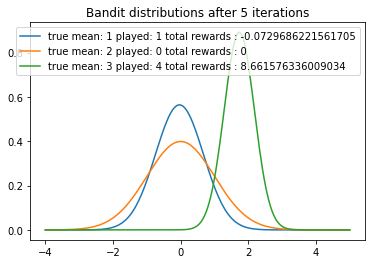

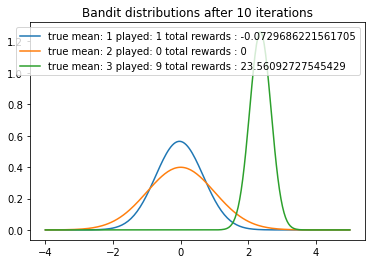

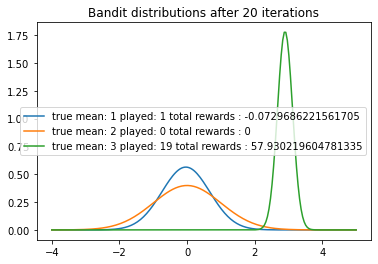

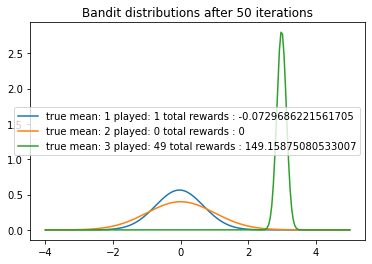

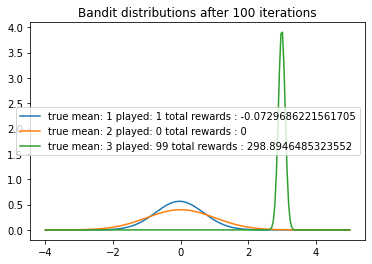

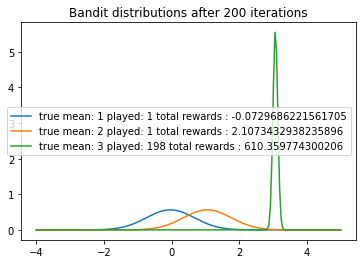

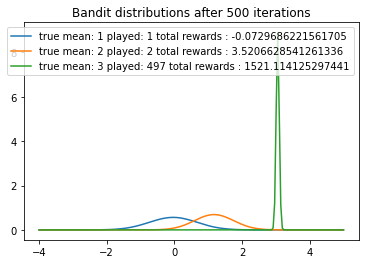

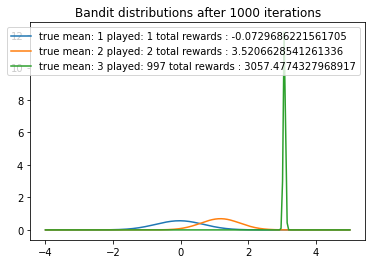

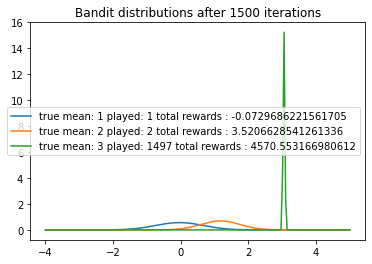

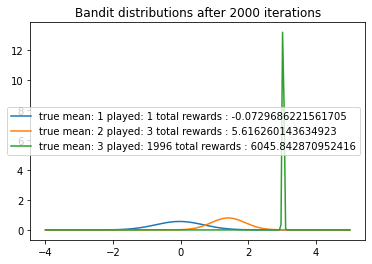

In [70]:
for t in range(NUM_TRIALS):
    samples = [b.sample() for b in bandits]
    j = np.argmax(samples)
    num_times_selected_each[j] += 1
    r = bandits[j].pull()
    bandits[j].update(r)
    rewards += [r]
    wins[j] += r
    # plot every
    if (t+1) in print_epochs:
        plot_dist(bandits,wins,t+1)

In [71]:
print('reward: ',sum(rewards),'/',NUM_TRIALS*max_reward)
print('overall win rate : ',sum(rewards)/(NUM_TRIALS*max_reward))

reward:  6051.386162473896 / 6000
overall win rate :  1.008564360412316


In [72]:
# lets aslo polt the cumulative average reward

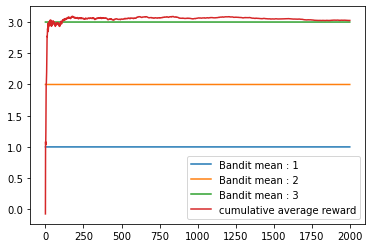

In [73]:
cumulative_rewards = np.cumsum(rewards)
win_rates = cumulative_rewards/(np.arange(NUM_TRIALS)+1)
for b in bandits:
    plt.plot([b.p]*NUM_TRIALS,label='Bandit mean : '+str(b.p))
plt.plot(win_rates,label='cumulative average reward')
plt.legend()
plt.show()

<h1>Math</h1>

In this section, we are going to consider a new scenario which will provide some depth to what we have been doing this whole time

---

<h3>Calculating a Sample Mean (pt 2)</h3>

Earlier, we did a section that was all about how to calculate a sample mean without having to store all the values so that we would need to some of them all together in one go

This is a sequel to that section

So it's the next stage of what we need to discuss when it comes to calculating a sample mean

Now, again, we want to mention that, we probably at first glance think this is a very trivial topic and that perhaps there should be no need at all to discuss why one would have to talk about calculating sample means to such great depth

However, as we learn more about reinforcement learning (in future notebooks), we will progressively connect the dots

So let's start with just reviewing what we've established already

First, we figured out how we could calculate a sample mean out of $N$ samples in terms of the sample mean from the first $N-1$ one samples

$$\large \bar X_N = \frac{1}{N} \left((N-1) \bar X_{N-1} + X_N\right)$$

Then we did some basic algebra on this equation to turn it into a new form, one the kind of looks like gradient descent

$$\large = \frac{(N-1)}{N} \bar X_{N-1} + \frac{1}{N} X_N$$

$$\large = \left(1-\frac{1}{N} \right) \bar X_{N-1}  + \frac{1}{N} X_N $$

$$\large  = \bar X_{N-1} + \frac{1}{N} \left( X_N - \bar X_{N-1} \right)$$

---

<h3>Nonstationary Rewards</h3>

In this lecture, we are going to answer the question, what happens if the reward is non-stationary?

Well, first, we have to talk about what stationarity means in the first place, so let's start with that

In our previous examples, a reward always came from the same distribution 

To state it in the usual way, the rewards from each bandit were iid, independent and identically distributed

This is not unrealistic, but what about another possible scenario?

What if the distribution of the rewards changes over time, so that in essence, our sample mean calculation doesn't make any sense because the mean at some previous time is not the same as the mean currently

To give it a more concrete definition, a stationary process is generally a random process whose distribution does not change over time

That's usually what we refer to as Strong-sense stationarity

Most of the time in statistics and signal processing, we are interested in a Weak-sense stationarity, which relaxes the idea that the entire distribution has to remain constant over time

Instead, only the mean and autocovariance of the reward has to be constant over time in order to have a weak-sense stationary

Now, if we don't know where any of these things mean, it's optional :)

So just kind of remember, the basic ideas 

Stationary means things don't change over time

If today our  slot machine is giving us a win rate of $10 \%$ and tomorrow our slot machine is giving us a win rate of $90 \%$, that's non stationary

Also, we can look at these examples shown here

<img src='extras/52.34.PNG' width='900'></img>

so on the left we have white noise, which is stationary

The distribution doesn't change over time

On the right, we have bitcoins U.S. dollar exchange rate, as we can see, both the mean and autocovariance change over time

---

<h3>Dealing with Nonstationary Reward</h3>

So what do we do when our reward signal is non stationary?

Clearly taking the sample mean won't work?

Well, let's look at our equation for updating the sample mean again

$\require{\cancel}$

$$\large \bar X_N = \bar X_{N-1} + \frac{1}{N} \left(X_N - \bar X_{N-1} \right)$$

We claim that if we take this equation and we say instead of taking our learning rate to be $\frac{1}{N}$, we take our learning rate to be constant, this will give us an exponentially weighted moving average

$$\large \bar X_N = \bar X_{N-1} + \cancel{\frac{1}{N}} \left(X_N - \bar X_{N-1} \right)$$

$$\large \bar X_N = \bar X_{N-1} + \boxed{\alpha} \left(X_N - \bar X_{N-1} \right)$$

So what we are going to do with the rest of the section is, number one talk about why an exponentially weighted moving average makes sense, and number two, we're going to prove to that if we do the update with the constant learning rate that it indeed gives us the exponentially weighted moving average

---

First, let's talk about why an exponentially weighted moving average makes sense

<img src='extras/52.35.PNG' width='400'></img>

Let's start by recognizing what the arithmetic mean is in terms of a weighted sum

The sample mean of the first $N$ samples is the weighted sum of those $N$ samples where each of the weights is constant and equal to $\frac{1}{N}$

And that makes sense because if our true mean never changes, we would want each sample to contribute equally to the sample mean

But what if our mean does change over time?

We want your sample mean to reflect the most recent data and to account for the fact that the older the data is, the more unreliable it probably is

So what does the exponentially weighted moving average do?

Well, it does exactly what it sounds like, it gives weights to each sample that exponentially decay over time

That makes perfect sense, since if the mind is changing over time, then the most recent example
is the most reliable

The last sample is a little less reliable, and the sample before that is even less reliable and so forth

So this seems like a good way to keep track of the mean as it changes

---

<h3>How does it work</h3>

The next question we want to answer is, how does this update actually implement an exponentially weighted moving average?

Can we show that this is true?

In fact, it's not too difficult

It helps if we rearrange our mean update 

$$\large X_t = \bar X_{t-1} + \alpha (X_t - \bar X_{t-1})$$

so that we can state the sample mean at time $t$ to be a convex combination of the sample mean at time $t-1$ and the new sample at time $t$


$$\large X_t = (1-\alpha) \bar X_{t-1} + \alpha X_t$$

So this means something like give $90 \%$ of the weight to the previous sample mean and $10\%$
of the weight to the latest sample, and that would be if we chose $\alpha$ equals 0.1

Now, what we can do is just keep recursively plugging in older and older values of the sample mean

So we can replace $X_{T-1}$  with its representation in terms of $X_{T-2}$

$$\large \bar X_t = (1-\alpha) [(1-\alpha) \bar X_{t-2} + \alpha X_{t-1}] + \alpha X_t$$

Then we can multiply out the $1-\alpha$ term so that we get $\bar X_{t-2}$ by itself

$$\large \bar X_t = (1-\alpha)^2 \bar X_{t-2} + (1-\alpha)\alpha X_{t-1} + \alpha X_t$$

Now we have three terms $\bar X_t$, $X_{t-1}$, $X_t$

The next step, of course, is to replace $\bar X_{t-2}$ with its representation in terms of $\bar X_{t-3}$

$$\large = (1-\alpha)^2[(1-\alpha)\bar X_{t-3} + \alpha X_{t-2}] + (1-\alpha)\alpha X_{t-1} + \alpha X_t$$

From there, we can do the same thing, multiply out the $1-\alpha$ and get each of the terms by themselves

$$\large = (1-\alpha)^3 \bar X_{t-3} + (1-\alpha)^2\alpha X_{t-2} + (1-\alpha)\alpha X_{t-1} + \alpha X_t$$

At this point, we should see a pattern, the number of individual samples keeps growing and the power on the $1-\alpha$ term also keeps growing

If we keep repeating this pattern $t$ times, we end up with this expression involving a summation over all the past samples from $1$ up to $t$

$$\large = (1-\alpha)^t \bar X_0 + \alpha \sum^{t-1}_{k=0}(1-\alpha)^kX_{t-k}$$

And of course, these weights are exactly exponentially decaying

Since $\alpha$ is a number between zero and one, $1-\alpha$ is also a number between zero and one

And when we raise the number between zero and one to a power, it gets smaller and smaller exponentially as $k$ gets larger and larger

<h1>Math</h1>

In the following sections of this notebooks, we are going to look at some exercises to help us solidify and extend what you've learned in this notebook

---

<h3>Exercises</h3>

In this course, the ultimate goal was to eventually get us to the point where we were doing Thompson sampling, which allowed us to modify our posterior distribution for the parameter in question in real time

$$\large p(\theta \vert x) = \frac{p(x \vert \theta)p(\theta)}{\int p(x \vert \theta^\prime)p(\theta^\prime) d \theta^\prime}$$

That means for every sample we collect, we can update our beliefs and our estimate of the parameter becomes better

This is different from traditional AB testing where we have to run the whole test and only when it is finished can we answer any question

---

<h3>Conjugate Priors</h3>

The centerpiece of the Bayesian method is the conjugate prior

This allows us to update the parameters of the posterior in closed form, which usually just involves some addition and multiplication

In this notebook, since we're talking about A/B testing with a focus on e-commerce applications, we were mostly curious about things like clickthrough rates and conversion rates

This means our likelihood is a Bernoulli and our conjugate prior is the beta distribution

But of course, one has to wonder, outside of this very specific scenario, are there other such pairs of distributions?

---


One fact about Bayesian machine learning is that closed form solutions like this are the exception and not the rule

In other words, there are many more combinations of likelihoods and priors that do not lead to closed form solutions for the posterior

Of course, we can still try to solve those problems using numerical approximation methods, but that's a talk for a future notebook, far in the future in fact

In this notebook and possible sequels to this notebook, conjugate priors are still very much of interest

---

In the following sections, which are a set of exercises for us, we'll be looking at how to solve the posterior update for different sets of conjugate Priors

One example is the categorical distribution

This is just an extension of the Bernoulli where we can have more than two outcomes

So a Bernoulli is like flipping a coin because we can only get two outcomes heads or tails

A categorical means we can get any number of outcomes

Let's call that $K$

It's more like rolling a die 

So instead of just heads or tails, we can get a number, say, from one to six

So in that case, K would be six

One question is, well that sounds all nice and fancy, but is there a practical application for this?

---

<h3>Example</h3>

Here's one example, suppose a user lands on our landing page, we have a newsletter Sign-Up option, but there isn't just one, there are a few

So one option is called the welcome mat, where a thing drops down and covers the whole screen

There's also this kind of paper box that only shows up after we scroll down a bit on the page

Then there can be static sign up boxes that just sit somewhere on the page, maybe near the footer or in the header

So there are multiple ways one can sign up for our newsletter or one may simply not sign up at all :)

But clearly there are more than two options here

So by using a categorical distribution, we can model the probability of a user using any one of these options

And of course, we can apply this to any situation where the user has more than two choices

<h1>Math</h1>

In this section, we are going to look at another exercise, we definitely want to try this on our
own first

---

<h3>Excercise</h3>

Working with Conjugate Priors is a central part of the Bayesian machine learning

We already saw that a beta prior with a bernoulli likelihood are conjugate Priors and that represents a random process like flipping a coin repeatedly

We've been assuming that outcomes are binary and of course this isn't always the case in the real world

So in this exercise, we're going to generalize this a little bit

Suppose we are now rolling a die repeatedly, it can have six sides, but this should also work for
a die with any number of sides

So what are the conjugate priors for this problem?

---

<h3>Categorcail Likelihood</h3>

The first thing we want to do is model the likelihood

Because the outcomes are discrete, categorical variables, we model the likelihood as a categorical distribution

$$\large P(X \vert \theta) = \prod_{n=1}^{N} \prod_{k=1}^K \theta_k^{I(x_n == k)}$$

We're using the $I$ function here to mean the identity function

So it'll return 1 if its argument is true, meaning that $x_n = k$ and 0 otherwise

---

<h3>Drichilet Prior</h3>

Next, if we look up conjugate priors on Wikipedia, we'll see that the Dirichlet prior goes with the categorical likelihood 

Dirichlet is sort of like a multidimensional version of the beta distribution

So this makes sense 

So here is the pdf of the Dirichlet distribution

$$\large \text{Dirichlet}(\overrightarrow{\alpha}) = \frac{1}{B(\overrightarrow{\alpha})} \prod^K_{k=1} \theta_k^{\alpha_k-1}$$

The B function here is analogous to the B function for the beta distribution and so you can see a direct relationship to the beta distribution

$$\large B(\overrightarrow{\alpha}) = \frac{\prod\limits^K_{k=1} \Gamma(\alpha_k)}{\Gamma (\sum\limits^{K}_{k=1} \alpha_k)}$$

$$\large \overrightarrow{\alpha} = (\alpha_1,\ldots,\alpha_K)$$

---

<h3>Posterior</h3>

The next step is to combine the likelihood and the prior to determine the posterior

$$\large P(\theta \vert X) \propto \prod^N_{n=1} \prod^K_{k=1} \theta_k^{I(x_n == k)} \frac{1}{B(\overrightarrow{\alpha})} \prod^K_{k=1} \theta_k^{\alpha_k-1}$$

And so we can combine all the $\theta_k$s and move the product over $N$ and into the exponent, and this gives us something in the form of a Dirichlet distribution

$$\large P(\theta \vert X) \propto \prod^K_{k=1} \theta_k^{\alpha_k-1+\sum\limits^N_{n=1}I(x_n==k)}$$

---

$$\large P(\theta \vert X) = \text{Dirichlet}(\overrightarrow{\alpha}^\prime)$$

$$\large \alpha^\prime_k = \alpha_k + \sum^N_{n=1} I(x_n == k)$$

$$\large \alpha^\prime_k = \alpha_k + \# \text{ times k appeared}$$

So the new $\alpha_k$s (denoted $\alpha^\prime_k$) are just the old $\alpha_k$s, plus the number of times we got a $k$

So we see, this is exactly like a multidimensional coin toss